## Uvod

**O data setu**

Importujemo sve potrebne biblioteke

In [187]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import nltk

Ovaj kod isključuje prikazivanje upozorenja (warnings) u Python-u. Kada se upozorenja uključe, Python može ispisivati obaveštenja o potencijalnim problemima ili neobičnim situacijama koje su se desile tokom izvršavanja koda.

In [188]:
import warnings
warnings.filterwarnings('ignore')

Učitavamo podatke iz CSV datoteke 'text.csv' u DataFrame objekat nazvan df, koristeći Pandas biblioteku.

In [189]:
df = pd.read_csv('sentiment_analysis.csv')

In [190]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [191]:
# Pravljenje rečnika za praćenje duplikata
text_duplicates = {}

# Prolazak kroz DataFrame
for index, row in df.iterrows():
    text = row['text']
    # Provera da li postoji tekst u rečniku
    if text in text_duplicates:
        text_duplicates[text].append(index)
    else:
        text_duplicates[text] = [index]

# Ispis indeksa kolona sa duplikatima
for indexes in text_duplicates.values():
    if len(indexes) > 1:
        print(indexes)



[0, 66]
[1, 67]
[2, 68]
[3, 69]
[4, 70]
[5, 71]
[6, 72]
[7, 73]
[8, 74]
[9, 75]
[10, 76]
[11, 77]
[12, 78]
[13, 79]
[14, 80]
[15, 81]
[16, 82]
[17, 83]
[18, 84]
[19, 85]
[20, 86]
[21, 87]
[22, 88]
[23, 89]
[24, 90]
[25, 91]
[26, 92]
[27, 93]
[28, 94]
[29, 95]
[30, 96]
[31, 97]
[32, 98]
[33, 99]
[34, 100]
[35, 101]
[36, 102]
[37, 103]
[38, 104]
[39, 105]
[40, 106]
[41, 107]
[42, 108]
[43, 109]
[44, 110]
[45, 111]
[46, 112]
[58, 113, 205, 207]
[61, 116, 210]
[114, 206, 208]
[115, 209]
[117, 211]
[122, 216]
[123, 217]
[127, 221]
[128, 222]
[129, 223]
[141, 235]
[142, 236]
[147, 241]
[148, 242]
[149, 243]
[150, 244]
[151, 245]
[153, 247]
[155, 249]
[156, 250]
[159, 253]
[161, 255]
[166, 260]
[167, 261]
[170, 264]
[172, 266]
[173, 267]
[174, 268]
[175, 269]
[176, 270]
[177, 271]
[181, 275]
[182, 276]
[184, 278]
[185, 279]
[186, 280]
[187, 281]
[188, 282]
[189, 283]
[190, 284]
[191, 285]
[192, 286]
[193, 287]
[194, 288]
[195, 289]
[196, 290]
[197, 291]
[198, 292]
[199, 293]
[200, 294]
[201, 

Vidimo da u našem datasetu postoji dosta duplikata, njih moramo da izbrisemo.

Ova linija koda vraća dimenzije DataFrame-a df, odnosno broj redova i kolona u njemu.

In [192]:
df.shape

(499, 7)

U našem datasetu nalazi se 499 instanci, a svaka od njih opisana je sa 7 atributa.

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           499 non-null    int64 
 1   Month          499 non-null    int64 
 2   Day            499 non-null    int64 
 3   Time of Tweet  499 non-null    object
 4   text           499 non-null    object
 5   sentiment      499 non-null    object
 6   Platform       499 non-null    object
dtypes: int64(3), object(4)
memory usage: 27.4+ KB


In [194]:
# Izbacivanje duplikata na osnovu kolone 'text'
df = df.drop_duplicates(subset=['text'])

# Ispis prvih nekoliko redova DataFrame-a bez duplikata
print(df.head())


   Year  Month  Day Time of Tweet  \
0  2018      8   18       morning   
1  2018      8   18          noon   
2  2017      8   18         night   
3  2022      6    8       morning   
4  2022      6    8          noon   

                                                text sentiment     Platform  
0              What a great day!!! Looks like dream.  positive    Twitter    
1     I feel sorry, I miss you here in the sea beach  positive    Facebook   
2                                     Don't angry me  negative     Facebook  
3  We attend in the class just for listening teac...  negative    Facebook   
4                  Those who want to go, let them go  negative   Instagram   


In [195]:
df_newest = pd.read_csv('sentimentNewest.csv')
df_newest.tail()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
347,2023,10,22,night,Creating a beautiful mural with fellow art ent...,positive,Instagram
348,2015,11,10,noon,Participating in a school-wide art exhibition....,positive,Instagram
349,2016,9,14,noon,Achieving a personal best in a track and field...,positive,Twitter
350,2017,8,18,night,Collaborating on a science project that receiv...,positive,Facebook
351,2019,4,5,noon,Successfully fundraising for a school charity ...,positive,Twitter


In [196]:
print(df_newest['sentiment'].value_counts())
print(df_newest['Platform'].value_counts())
print(df_newest['Time of Tweet'].value_counts())

sentiment
positive                54
positive                47
neutral                 36
negative                33
neutral                 24
positive                23
neutral                 14
neutral                 13
positive                12
positive                11
positive                 8
positive                 8
neutral                  7
positive                 7
positive                 6
negative                 6
positive                 6
negative                 5
negative                 5
negative                 4
neutral                  4
negative                 4
neutral                  4
neutral                  2
negative                 2
neutral                  2
Positive                 1
negative                 1
negative                 1
positive                 1
negative                 1
Name: count, dtype: int64
Platform
Instagram     124
Facebook      109
Twitter        81
Twitter        38
Name: count, dtype: int64
Time of Tweet
noon  

In [197]:
# Uklanjanje nepotrebne praznine s početka i kraja svake oznake
df_newest['sentiment'] = df_newest['sentiment'].str.strip()
df_newest['sentiment'] = df_newest['sentiment'].str.lower()

# Zamjena različitih varijanti s jednom standardnom
df_newest['sentiment'].replace({'positive': 'positive', 'negative': 'negative', 'neutral': 'neutral'}, inplace=True)

# Uklanjanje nepotrebne praznine s početka i kraja svake oznake
df_newest['Platform'] = df_newest['Platform'].str.strip()

# Zamjena različitih varijanti s jednom standardnom
df_newest['Platform'].replace({'Facebook': 'Facebook', 'Instagram': 'Instagram', 'Twitter': 'Twitter'}, inplace=True)


In [198]:
print(df_newest['sentiment'].value_counts())
print(df_newest['Platform'].value_counts())
print(df_newest['Time of Tweet'].value_counts())

sentiment
positive    184
neutral     106
negative     62
Name: count, dtype: int64
Platform
Instagram    124
Twitter      119
Facebook     109
Name: count, dtype: int64
Time of Tweet
noon       193
night      103
morning     56
Name: count, dtype: int64


In [199]:
df = pd.concat([df, df_newest], ignore_index=True)

In [200]:
df.shape

(746, 7)

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           746 non-null    int64 
 1   Month          746 non-null    int64 
 2   Day            746 non-null    int64 
 3   Time of Tweet  746 non-null    object
 4   text           746 non-null    object
 5   sentiment      746 non-null    object
 6   Platform       746 non-null    object
dtypes: int64(3), object(4)
memory usage: 40.9+ KB


<font size="2">Tri atributa su numeričkog tipa (int64), dok su četiri atributa tipa object, što ukazuje na tekstualne podatke. 

Svaka instanca sadrži informacije o godini, mesecu i danu, vremenu objavljivanja objave, samom tekstu objave, sentimentu koji je izražen u objavi i platformi na kojoj je objavljena. 

Nema nedostajućih vrednosti (Non-Null Count za svaki atribut je 499), što znači da su svi podaci u datasetu potpuni.</font>

## EDA

EDA u data sciencu predstavlja skraćenicu od "Exploratory Data Analysis", što se na srpskom jeziku prevodi kao "Analiza podataka u istraživačke svrhe". EDA je proces istraživanja, analiziranja i vizualizacije skupa podataka radi razumevanja njegovih karakteristika, identifikacije obrazaca, pronalaženja odnosa između podataka i pripreme za dalju analizu. Ovaj korak je ključan u procesu analize podataka jer omogućava uvid u podatke pre primene složenijih analitičkih tehnika, kao i identifikaciju potencijalnih problema ili neobičnih pojava koje bi mogle zahtevati dodatno istraživanje ili obradu podataka. EDA može uključivati različite tehnike analize, uključujući statističke metode, vizualizaciju podataka, ispitivanje raspodele podataka, identifikaciju nedostajućih vrednosti ili anomalija, kao i generisanje hipoteza za dalju analizu.

### Statističke informacije o numeričkim kolonama

df.describe() je Pandas metod koji generiše osnovne statističke informacije o numeričkim kolonama u DataFrame-u df

In [202]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,746.0,2020.698391,2.986129,2010.0,2019.0,2023.0,2023.0,2023.0
Month,746.0,5.895442,3.620568,1.0,2.0,6.0,9.0,12.0
Day,746.0,15.800268,8.580393,1.0,9.0,15.0,22.0,31.0


Objasnjenje

<font size="2">
Broj (count): Imamo 499 uzoraka u našem skupu podataka. 

Srednja vrednost (mean): Srednja vrednost godina iznosi otprilike 2020.39. To znači da je prosečna godina u našem skupu podataka otprilike 2020.39.

Standardna devijacija (std): Ovo je mera raspršenosti naših podataka oko srednje vrednosti. Što je veća standardna devijacija, to su podaci više raspršeni oko srednje vrednosti. U ovom slučaju, standardna devijacija iznosi otprilike 2.83. 
Ako uzmemo srednju vrednost i dodamo ili oduzmemo standardnu devijaciju, pokrićemo oko 68% podataka. Ako dupliramo standardnu devijaciju, to će pokriti oko 95% podataka, a ako je pomnožimo sa tri, ona će pokriti otprilike 99.7% podataka. Ovo nam daje ideju o tome kako su naši podaci raspoređeni oko srednje vrednosti.

Minimalna vrednost (min): Ovo je najmanja vrednost u našem skupu podataka. Minimalna godina u našem skupu podataka je 2010.

25% (prvih 25% podataka): Ovo je vrednost ispod koje padaju 25% najmanjih vrednosti u našem skupu podataka. U ovom slučaju, 25% objava je objavljeno 2019. godine ili ranije.

50% (medijan): Ovo je središnja vrednost naših podataka, tj. vrednost koja deli naše podatke na pola. To znači da je 50% naših podataka manje od ovog broja, a 50% je veće. U ovom slučaju, medijan godina je 2021.

75% (prvih 75% podataka): Ovo je vrednost ispod koje padaju 75% najmanjih vrednosti u našem skupu podataka. U ovom slučaju, 75% objava je objavljeno 2023. godine ili ranije.

Maksimalna vrednost (max): Ovo je najveća vrednost u našem skupu podataka. Maksimalna godina u našem skupu podataka je takođe 2023.
</font>


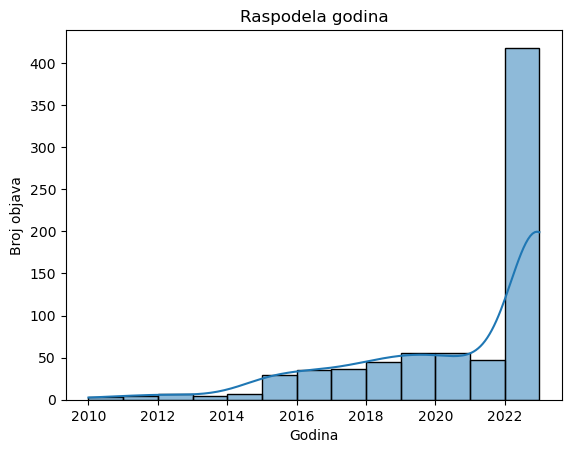

In [203]:
sns.histplot(df['Year'], bins=13, kde=True) #13 binova jer toliko razlicitih godina ima u data setu
plt.xlabel('Godina')
plt.ylabel('Broj objava')
plt.title('Raspodela godina')
plt.show()

<font size="2">kde u funkciji sns.histplot() označava da li želite da se nacrta "Kernel Density Estimate" (KDE) grafikon zajedno sa histogramom. KDE je način prikazivanja distribucije podataka kao glatke funkcije gustine verovatnoće. </font>

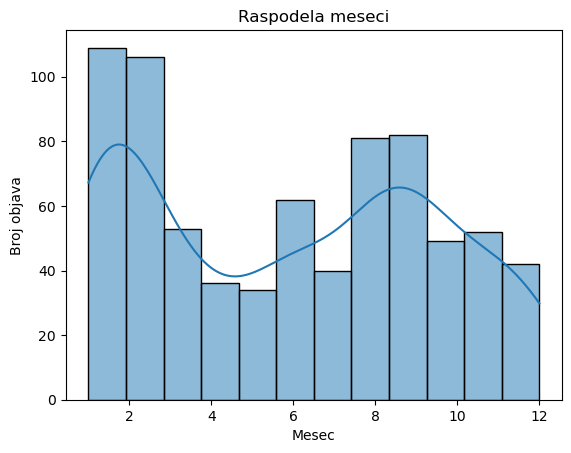

In [204]:
sns.histplot(df['Month'], bins=12, kde=True)
plt.xlabel('Mesec')
plt.ylabel('Broj objava')
plt.title('Raspodela meseci')
plt.show()

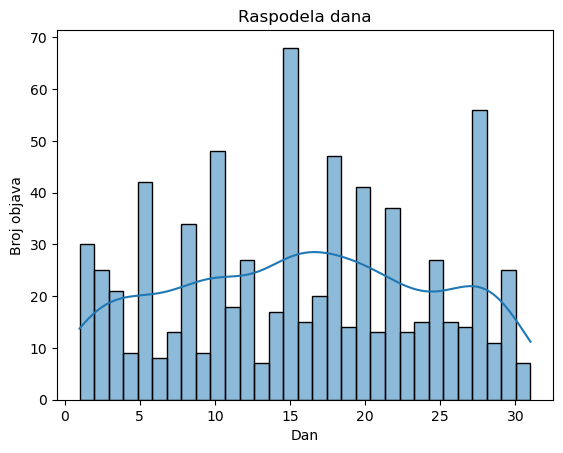

In [205]:
sns.histplot(df['Day'], bins=31, kde=True)
plt.xlabel('Dan')
plt.ylabel('Broj objava')
plt.title('Raspodela dana')
plt.show()

### Duzina teksta

Ova linija koda dodaje novu kolonu 'text_length' u DataFrame df. Vrednosti u ovoj koloni predstavljaju dužinu teksta iz kolone 'text', koja se računa primenom funkcije len() na svaki tekst u toj koloni.

In [206]:
df['text_length'] = df['text'].apply(len)


Ovaj kod koristi biblioteku Plotly Express kako bi kreirao histogram koji prikazuje distribuciju dužine tekstova iz kolone 'new_text' DataFrame-a df.

Na x-osi se nalazi dužina tekstova, prikazana u formi intervala (bins).
nbins=100 označava da se histogram deli na 100 jednakih intervala (bins) duž x-ose, što znači da će biti prikazano 100 stubića. Ovo nam omogućava da vidimo kako je dužina tekstova raspoređena u skupu podataka.

In [207]:
px.histogram(data_frame=df, x='text_length',nbins=50)

### Analiza atributa doba dana objave i njegovog odnosa sa duzinom teksta

Funkcija countplot() iz Seaborn biblioteke koristi se za grafički prikaz broja pojavljivanja svakog elementa kategoričkog atributa 'Time of Tweet' iz DataFrame-a df, pomoću trakastog dijagrama duž x-ose. Ova vizualizacija omogućava upoređivanje učestalosti različitih vremena objavljivanja tweetova u podacima.

<Axes: xlabel='Time of Tweet', ylabel='count'>

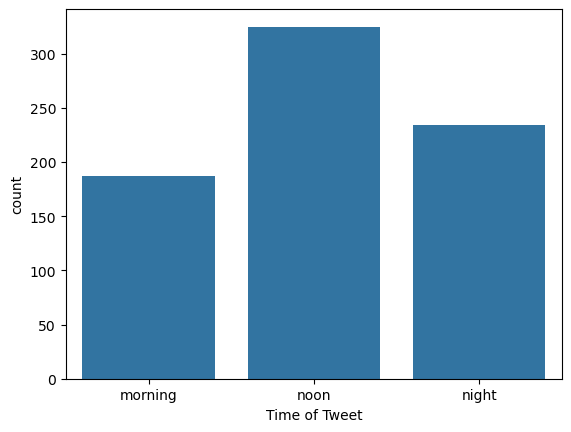

In [208]:
sns.countplot(data=df, x='Time of Tweet')

Ova linija koda generiše brojanje pojavljivanja svake jedinstvene vrednosti u koloni 'Time of Tweet' DataFrame-a df i smešta rezultat u promenljivu tot. Ovo će vratiti Seriju (Series) u kojoj su jedinstvene vrednosti kolone 'Time of Tweet' prikazane kao indeksi, a broj njihovih pojavljivanja kao vrednosti.

In [209]:
tot = df['Time of Tweet'].value_counts()
print(tot)

Time of Tweet
noon       325
night      234
morning    187
Name: count, dtype: int64


In [210]:
px.pie(data_frame=tot,names= tot.index, values=tot.values,title="Distribucija objava")

Ovaj kod koristi biblioteku Plotly Express kako bi kreirao rasipni (scatter) dijagram koji prikazuje odnos između dužine teksta (broj karaktera) i doba dana objave iz DataFrame-a df.

Na x-osi se nalaze različita doba iz kolone 'Time of Tweet'.
Na y-osi se nalazi dužina teksta iz kolone 'text', koja se računa primenom funkcije len() na svaki tekst u toj koloni.

In [211]:
px.scatter(data_frame=df,x='Time of Tweet',y=df['text'].apply(len))

Ova linija koda grupiše podatke u DataFrame-u df po koloni 'Time of Tweet' i za svaku grupu računa prosečnu dužinu teksta iz kolone 'text_length'. Rezultat je Serija (Series) u kojoj su indeksi doba iz kolone 'Time of Tweet', a vrednosti predstavljaju prosečnu dužinu teksta za svaku doba.

In [212]:
avg_len = df.groupby('Time of Tweet')['text_length'].mean()

Ovaj kod koristi biblioteku Plotly Express kako bi kreirao stubičasti dijagram (bar plot) koji prikazuje prosečnu dužinu teksta za svako doba objave iz DataFrame-a df.

Na x-osi su prikazana doba iz indeksa avg_len.
Na y-osi su prosečne dužine teksta koje su vrednosti u Seriji avg_len.
Svaka traka u stubićastom dijagramu je obojena u boju koja odgovara odgovarajućem dobu dana objave.
fig.update_xaxes() i fig.update_yaxes() koriste se za dodavanje naslova x i y osi.
Na kraju, fig.show() prikazuje kreirani stubičasti dijagram.

In [213]:
fig = px.bar(data_frame=df, x=avg_len.index,y=avg_len.values,color=avg_len.index)
fig.update_xaxes(title_text='Doba dana objave')
fig.update_yaxes(title_text='Prosecna duzina objave')
fig.show()

### Analiza Sentimenta i njegovog odnosa sa dužinom teksta

Istu proces ponavljamo i za sentiment.

<Axes: xlabel='sentiment', ylabel='count'>

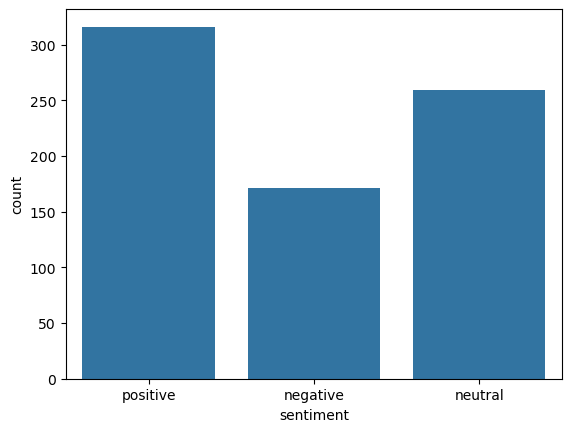

In [214]:
sns.countplot(data=df, x='sentiment')

In [215]:
sentiment = df['sentiment'].value_counts()
print(sentiment)

sentiment
positive    316
neutral     259
negative    171
Name: count, dtype: int64


In [216]:
px.pie(data_frame=sentiment,names= sentiment.index, values=sentiment.values,title="Distribucija sentimenta")

In [217]:
px.scatter(data_frame=df,x='sentiment',y=df['text'].apply(len))

In [218]:
avg_len = df.groupby('sentiment')['text_length'].mean()

In [219]:
fig = px.bar(data_frame=df, x=avg_len.index,y=avg_len.values,color=avg_len.index)
fig.update_xaxes(title_text='Sentiment')
fig.update_yaxes(title_text='Prosecna duzina teksta objave')
fig.show()

### Analiza kolone platforma i njenog odnosa sa dužinom teksta

Takodje, isti proces ponavljamo i za platformu. 

<Axes: xlabel='Platform', ylabel='count'>

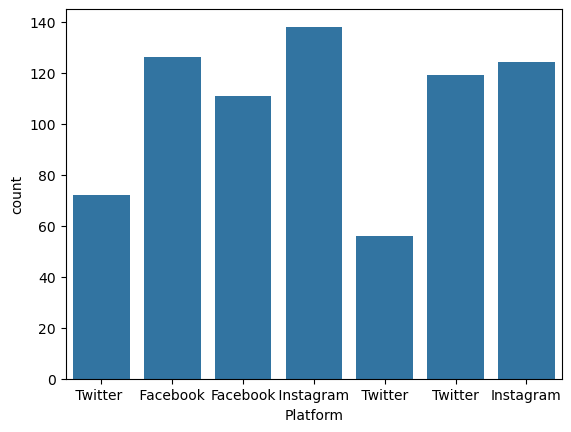

In [220]:
sns.countplot(data=df, x='Platform')

In [221]:
platform = df['Platform'].value_counts()
print(platform)

Platform
 Instagram     138
 Facebook      126
Instagram      124
Twitter        119
Facebook       111
 Twitter        72
 Twitter        56
Name: count, dtype: int64


Vidimo da postoje duplikati u platformama i to resavamo na sledeci nacin.

In [222]:
# Uklanjanje viška razmaka iz naziva platformi
df['Platform'] = df['Platform'].str.strip()

# Spajanje duplikata za Facebook i Twitter platforme
df.loc[df['Platform'] == 'Facebook', 'Platform'] = 'Facebook'
df.loc[df['Platform'] == 'Twitter', 'Platform'] = 'Twitter'


Nakon uklanjanja viška razmaka, potencijalno može ostati više različitih varijanti iste platforme zbog različitog pisanja ili formatiranja. Na primer, može postojati "Facebook", " Facebook" i "facebook" kao različiti unosi za istu platformu. Ovde se koristi .loc funkcija za pronalaženje svih unosa koji se podudaraju sa određenom platformom (npr. "Facebook" ili "Twitter") i ažuriranje svih tih unosa na standardizovanu vrednost. Na taj način, svi duplikati će biti spojeni i podaci će biti ujednačeni.

In [223]:
platform = df['Platform'].value_counts()
print(platform)

Platform
Instagram    262
Twitter      247
Facebook     237
Name: count, dtype: int64


In [224]:
px.pie(data_frame=platform,names= platform.index, values=platform.values,title="Distribucija Platformi")

In [225]:
px.scatter(data_frame=df,x='Platform',y=df['text'].apply(len))

In [226]:
avg_len = df.groupby('Platform')['text_length'].mean()

In [227]:
fig = px.bar(data_frame=df, x=avg_len.index,y=avg_len.values,color=avg_len.index)
fig.update_xaxes(title_text='Platforma')
fig.update_yaxes(title_text='Prosecna duzina teksta objave')
fig.show()

### Analize medjusobnih odnosa Doba dana objave, Sentimenta i platforme objave

#### Odnos doba dana i sentimenta objave

Ovaj kod koristi Seaborn biblioteku za kreiranje countplot-a koji prikazuje odnos između vremena objavljivanja objave i sentimenta. Svaka traka na grafikonu predstavlja broj objava za određeno vreme objavljivanja, pri čemu su boje traka različite u skladu sa sentimentom (npr. pozitivni, negativni, neutralni). Dodatno, grafikon uključuje legendu koja označava svaki sentiment.

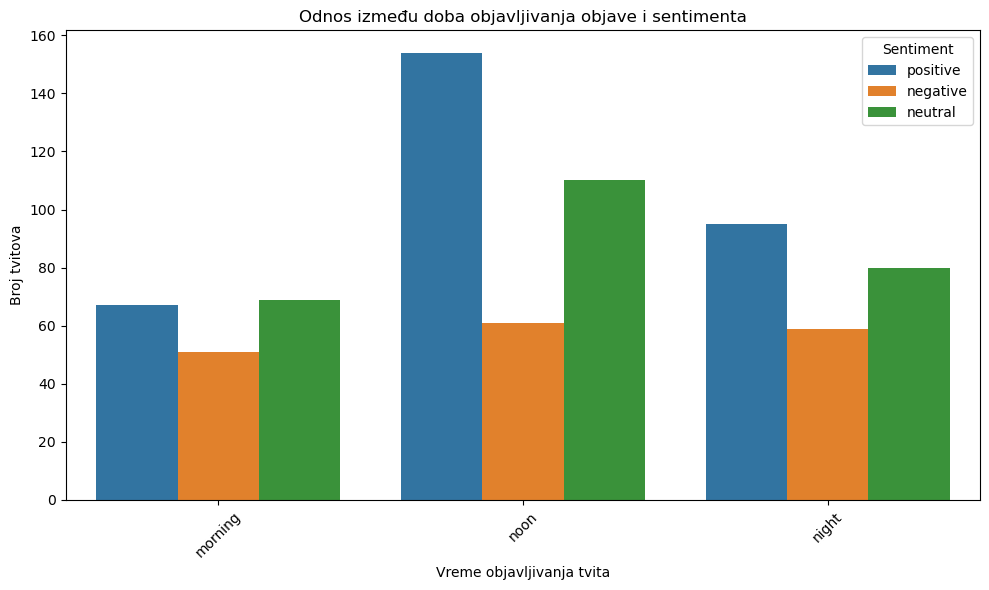

In [228]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time of Tweet', hue='sentiment')
plt.xlabel('Vreme objavljivanja tvita')
plt.ylabel('Broj tvitova')
plt.title('Odnos između doba objavljivanja objave i sentimenta')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

Obzirom da zasvako doba dana preovladava neutralan sentiment, jer ukupno ima najvise tvitova sa ovim sentimentom, ne mozemo da imamo jasan uvid u to da li se sentiment menja u odnosu na doba dana kada je postavljena objava. Da bismo taj problem rešili moramo izvršiti balansiranje podataka tako da broj objava bude isti za svaki sentiment. To radimo na sledeći način.

In [229]:
# Izračunavanje broja tvitova za svaki sentiment
sentiment_counts = df['sentiment'].value_counts()

# Pronalaženje najmanjeg broja tvitova među svim sentimentima
min_count = sentiment_counts.min()

# Lista za čuvanje izjednačenih podataka
balanced_data = []

# Iteriranje kroz svaki sentiment
for sentiment in df['sentiment'].unique():
    # Odabir slučajnih indeksa za izjednačavanje broja tvitova
    indices = np.random.choice(df[df['sentiment'] == sentiment].index, min_count, replace=False)
    # Dodavanje izjednačenih podataka u listu
    balanced_data.append(df.loc[indices])

# Spajanje izjednačenih podataka u novi DataFrame
balanced_df = pd.concat(balanced_data)

# Prikaz rezultata
print(balanced_df['sentiment'].value_counts())

sentiment
positive    171
negative    171
neutral     171
Name: count, dtype: int64


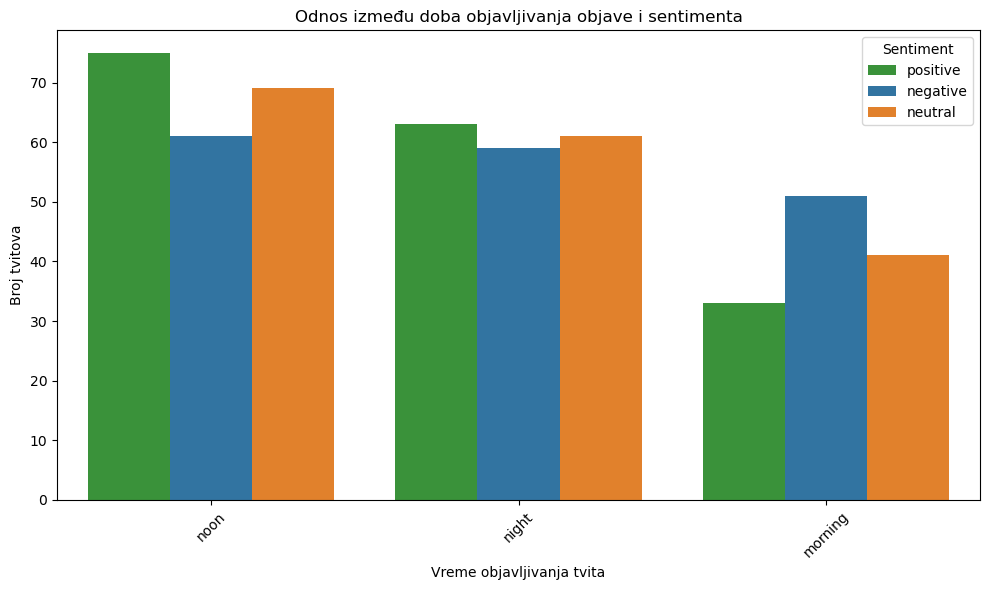

In [230]:
# Definisanje boja za svaki sentiment
sentiment_colors = {'positive': '#2ca02c', 'neutral': '#ff7f0e', 'negative': '#1f77b4'}

# Kreiranje countplot-a sa definisanim bojama za svaki sentiment
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='Time of Tweet', hue='sentiment', palette=sentiment_colors)
plt.xlabel('Vreme objavljivanja tvita')
plt.ylabel('Broj tvitova')
plt.title('Odnos između doba objavljivanja objave i sentimenta')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

Sada jasno vidimo razliku u odnosu sentimenta za svaku doba dana, dole to prikazujemo i u piechartu.

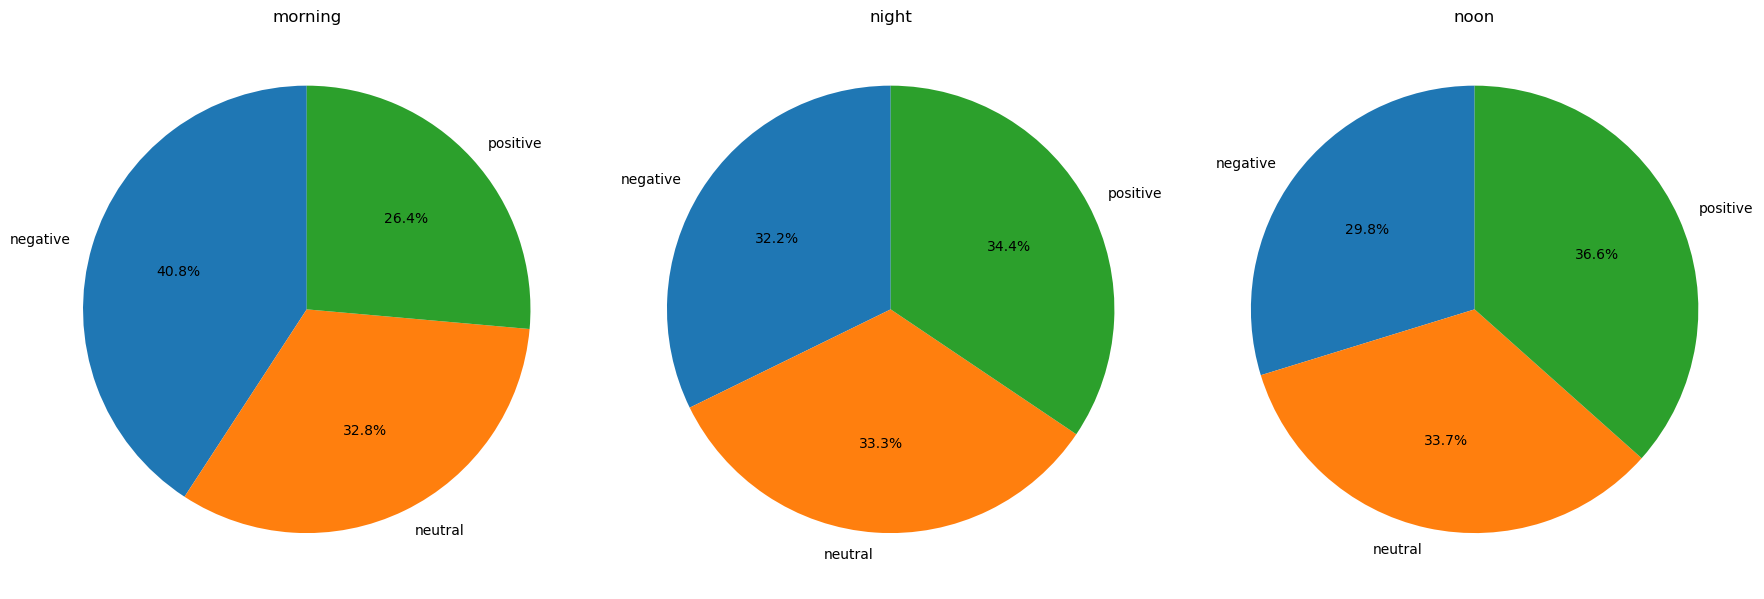

In [231]:
# Kreiranje DataFrame-a koji sadrži broj tvitova za svako vreme objavljivanja i sentiment
time_sentiment_counts = balanced_df.groupby(['Time of Tweet', 'sentiment']).size().unstack(fill_value=0)

# Prikaz pie chart-ova za svako vreme objavljivanja
fig, axs = plt.subplots(nrows=1, ncols=len(time_sentiment_counts.index), figsize=(6 * len(time_sentiment_counts.index), 6))

# Prikaz pie chart-ova za svako vreme objavljivanja
for i, (time, sentiment_counts) in enumerate(time_sentiment_counts.iterrows()):
    axs[i].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{time}')

plt.tight_layout()
plt.show()

#### Odnos doba dana i platforme objavljivanja

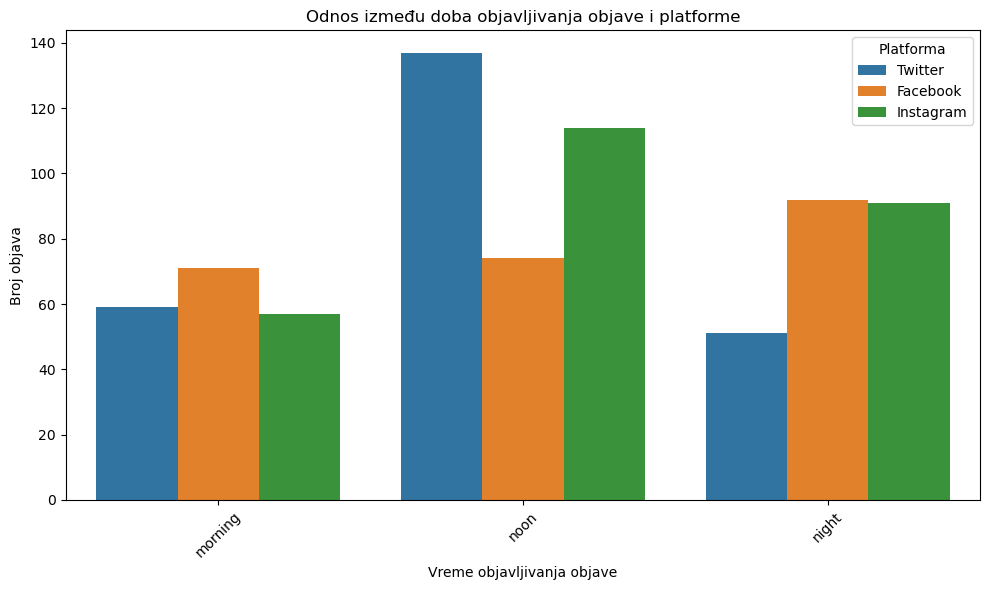

In [232]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Time of Tweet', hue='Platform')
plt.xlabel('Vreme objavljivanja objave')
plt.ylabel('Broj objava')
plt.title('Odnos između doba objavljivanja objave i platforme')
plt.xticks(rotation=45)
plt.legend(title='Platforma')
plt.tight_layout()
plt.show()

In [233]:
print(df['Platform'].value_counts())

Platform
Instagram    262
Twitter      247
Facebook     237
Name: count, dtype: int64


In [234]:
# Izračunavanje broja tvitova za svaku platformu
platform_counts = df['Platform'].value_counts()

# Pronalaženje najmanjeg broja tvitova među svim platformama
min_count = platform_counts.min()

# Lista za čuvanje izjednačenih podataka
balanced_data = []

# Iteriranje kroz svaku platformu
for platform in df['Platform'].unique():
    # Odabir slučajnih indeksa za izjednačavanje broja tvitova
    indices = np.random.choice(df[df['Platform'] == platform].index, min_count, replace=False)
    # Dodavanje izjednačenih podataka u listu
    balanced_data.append(df.loc[indices])

# Spajanje izjednačenih podataka u novi DataFrame
balanced_df = pd.concat(balanced_data)

# Prikaz rezultata
print(balanced_df['Platform'].value_counts())

Platform
Twitter      237
Facebook     237
Instagram    237
Name: count, dtype: int64


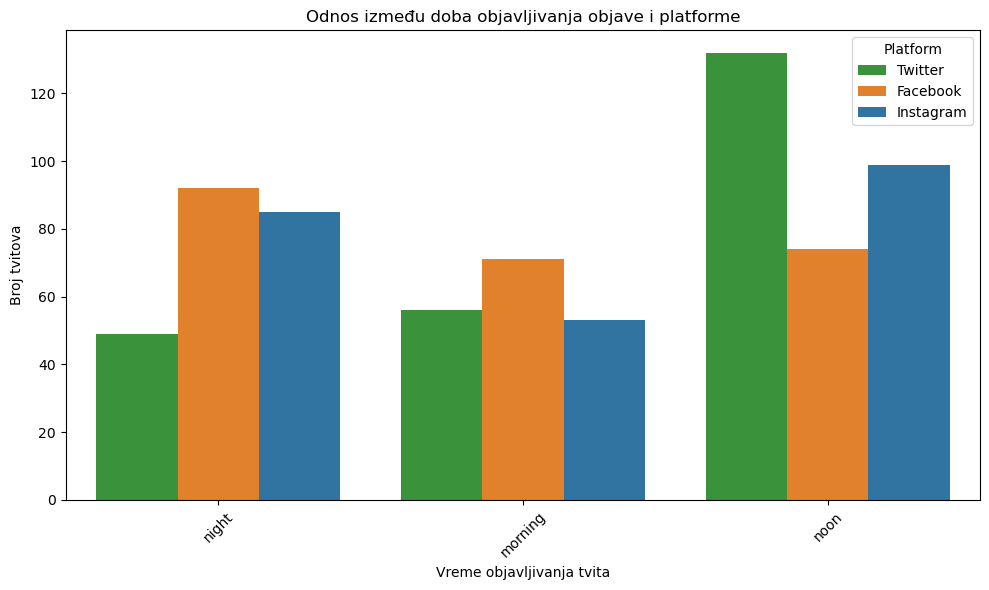

In [235]:
# Definisanje boja za svaku platformu
platform_colors = {'Instagram': '#1f77b4', 'Facebook': '#ff7f0e', 'Twitter': '#2ca02c'}

# Kreiranje countplot-a sa definisanim bojama za svaku platformu
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='Time of Tweet', hue='Platform', palette=platform_colors)
plt.xlabel('Vreme objavljivanja tvita')
plt.ylabel('Broj tvitova')
plt.title('Odnos između doba objavljivanja objave i platforme')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

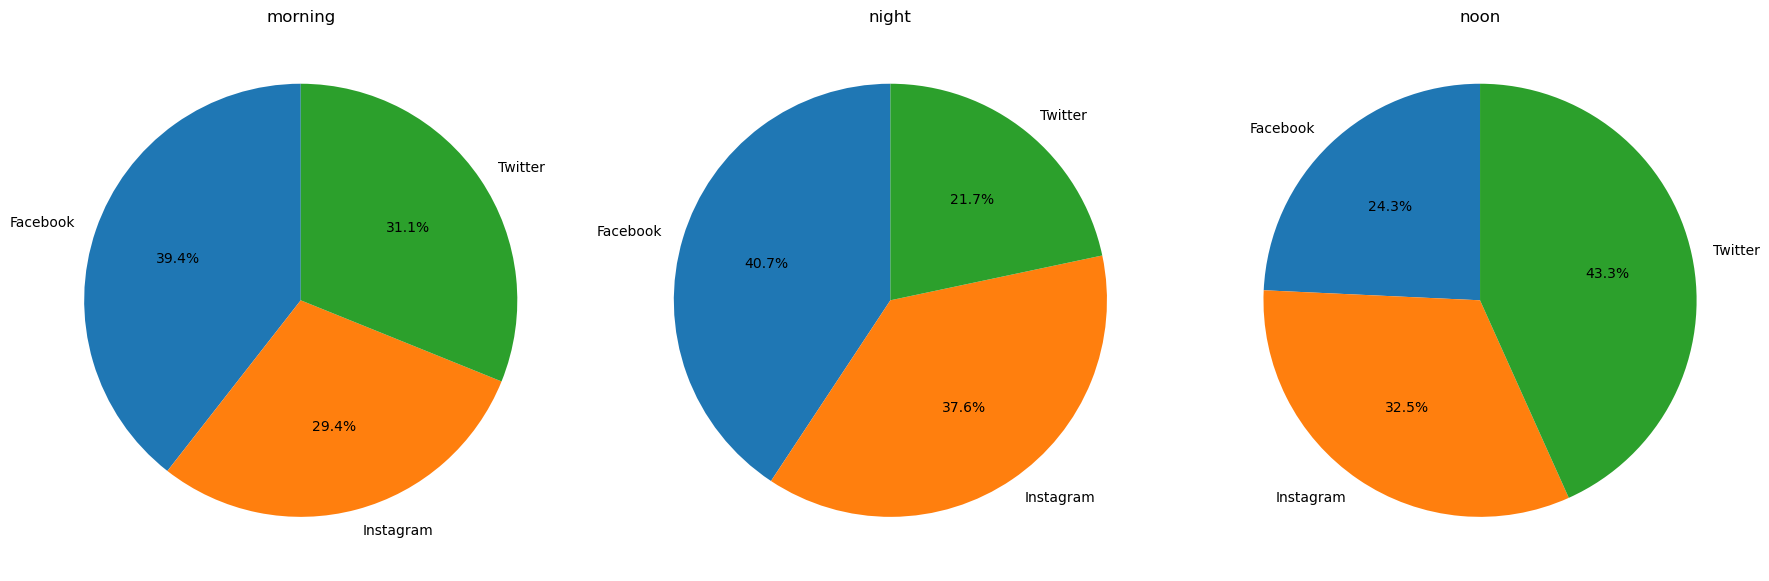

In [236]:
# Kreiranje DataFrame-a koji sadrži broj tvitova za svako vreme objavljivanja i platformu
time_platform_counts = balanced_df.groupby(['Time of Tweet', 'Platform']).size().unstack(fill_value=0)

# Prikaz pie chart-ova za svako vreme objavljivanja
fig, axs = plt.subplots(nrows=1, ncols=len(time_platform_counts.index), figsize=(6 * len(time_platform_counts.index), 6))

# Prikaz pie chart-ova za svako vreme objavljivanja
for i, (time, platform_counts) in enumerate(time_platform_counts.iterrows()):
    axs[i].pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{time}')

plt.tight_layout()
plt.show()


#### Odnos Sentimenta i platforme objavljivanja

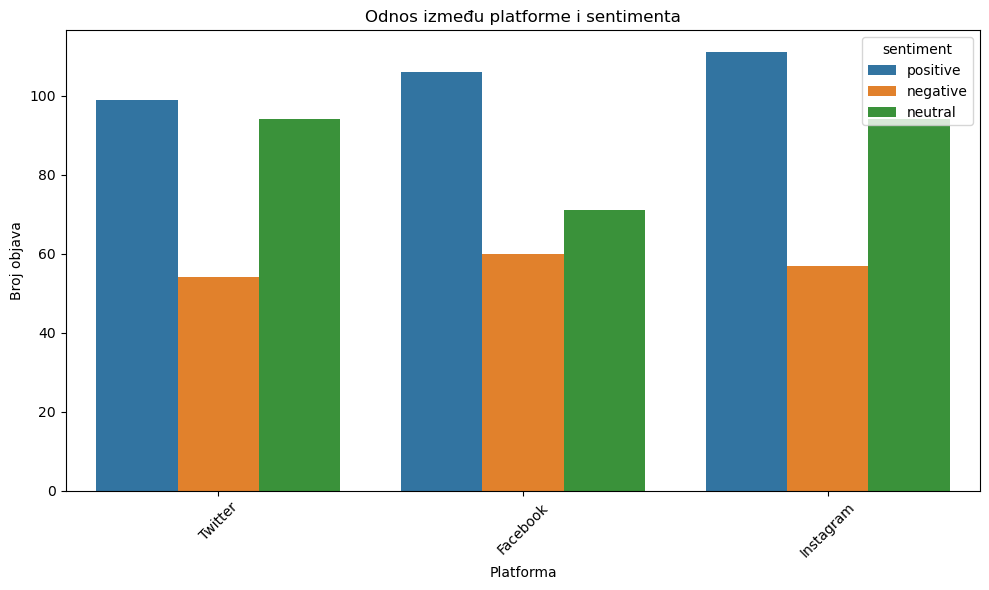

In [237]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Platform', hue='sentiment')
plt.xlabel('Platforma')
plt.ylabel('Broj objava')
plt.title('Odnos između platforme i sentimenta')
plt.xticks(rotation=45)
plt.legend(title='sentiment')
plt.tight_layout()
plt.show()

In [238]:
# Izračunavanje broja tvitova za svaki sentiment
sentiment_counts = df['sentiment'].value_counts()

# Pronalaženje najmanjeg broja tvitova među svim sentimentima
min_count = sentiment_counts.min()

# Lista za čuvanje izjednačenih podataka
balanced_data = []

# Iteriranje kroz svaki sentiment
for sentiment in df['sentiment'].unique():
    # Odabir slučajnih indeksa za izjednačavanje broja tvitova
    indices = np.random.choice(df[df['sentiment'] == sentiment].index, min_count, replace=False)
    # Dodavanje izjednačenih podataka u listu
    balanced_data.append(df.loc[indices])

# Spajanje izjednačenih podataka u novi DataFrame
balanced_df = pd.concat(balanced_data)

# Prikaz rezultata
print(balanced_df['sentiment'].value_counts())

sentiment
positive    171
negative    171
neutral     171
Name: count, dtype: int64


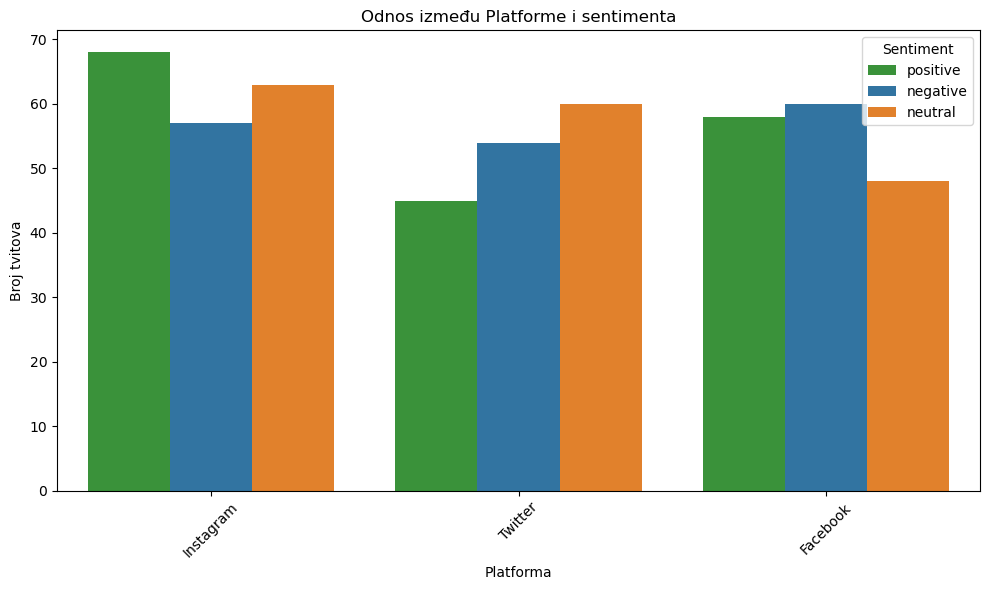

In [239]:
# Definisanje boja za svaki sentiment
sentiment_colors = {'positive': '#2ca02c', 'neutral': '#ff7f0e', 'negative': '#1f77b4'}

# Kreiranje countplot-a sa definisanim bojama za svaki sentiment
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='Platform', hue='sentiment', palette=sentiment_colors)
plt.xlabel('Platforma')
plt.ylabel('Broj tvitova')
plt.title('Odnos između Platforme i sentimenta')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

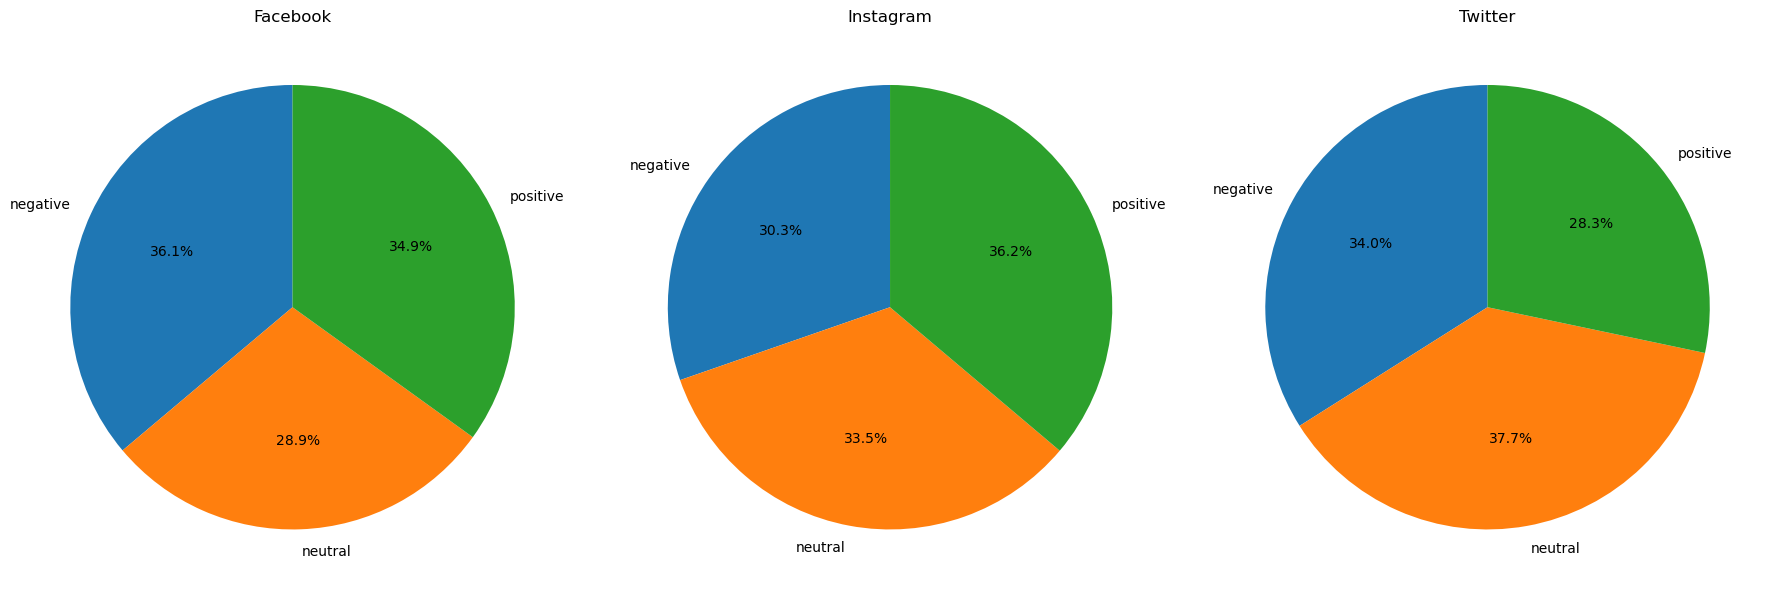

In [240]:
# Kreiranje DataFrame-a koji sadrži broj tvitova za svako vreme objavljivanja i sentiment
time_sentiment_counts = balanced_df.groupby(['Platform', 'sentiment']).size().unstack(fill_value=0)

# Prikaz pie chart-ova za svako vreme objavljivanja
fig, axs = plt.subplots(nrows=1, ncols=len(time_sentiment_counts.index), figsize=(6 * len(time_sentiment_counts.index), 6))

# Prikaz pie chart-ova za svako vreme objavljivanja
for i, (time, sentiment_counts) in enumerate(time_sentiment_counts.iterrows()):
    axs[i].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{time}')

plt.tight_layout()
plt.show()

### Analiza odnosa godine se sentimentom

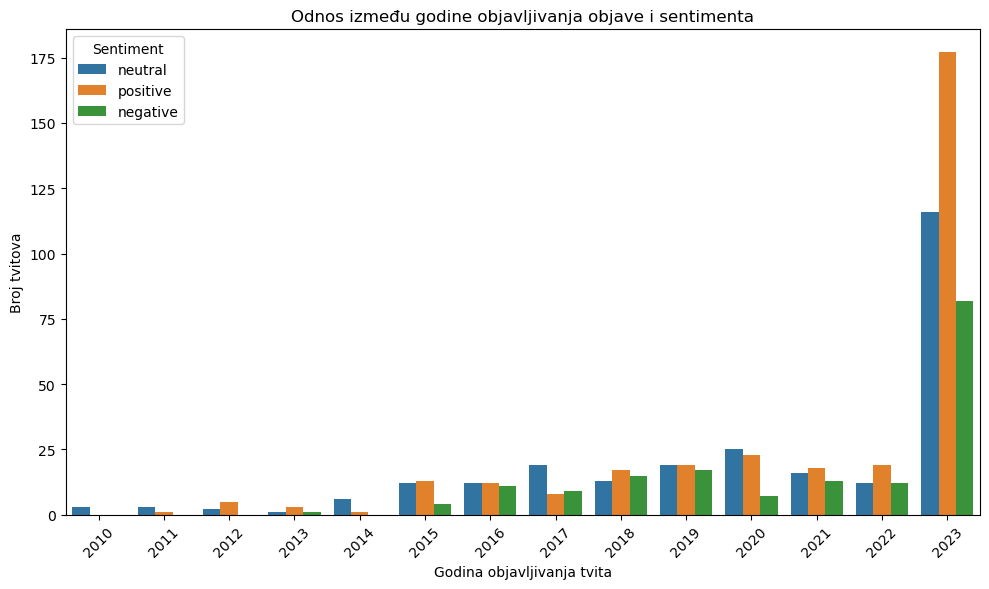

In [241]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Year', hue='sentiment')
plt.xlabel('Godina objavljivanja tvita')
plt.ylabel('Broj tvitova')
plt.title('Odnos između godine objavljivanja objave i sentimenta')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [242]:
newdf = df[df["Year"] > 2014]

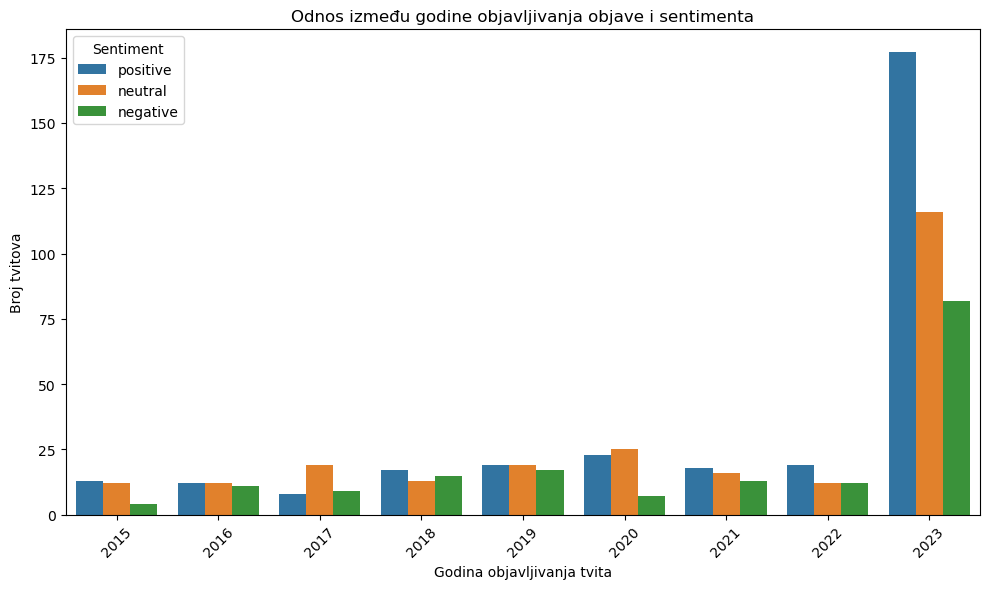

In [243]:
plt.figure(figsize=(10, 6))
sns.countplot(data=newdf, x='Year', hue='sentiment')
plt.xlabel('Godina objavljivanja tvita')
plt.ylabel('Broj tvitova')
plt.title('Odnos između godine objavljivanja objave i sentimenta')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [244]:
# Izračunavanje broja tvitova za svaki sentiment
sentiment_counts = newdf['sentiment'].value_counts()

# Pronalaženje najmanjeg broja tvitova među svim sentimentima
min_count = sentiment_counts.min()

# Lista za čuvanje izjednačenih podataka
balanced_data = []

# Iteriranje kroz svaki sentiment
for sentiment in newdf['sentiment'].unique():
    # Odabir slučajnih indeksa za izjednačavanje broja tvitova
    indices = np.random.choice(newdf[newdf['sentiment'] == sentiment].index, min_count, replace=False)
    # Dodavanje izjednačenih podataka u listu
    balanced_data.append(newdf.loc[indices])

# Spajanje izjednačenih podataka u novi DataFrame
balanced_df = pd.concat(balanced_data)

# Prikaz rezultata
print(balanced_df['sentiment'].value_counts())

sentiment
positive    170
negative    170
neutral     170
Name: count, dtype: int64


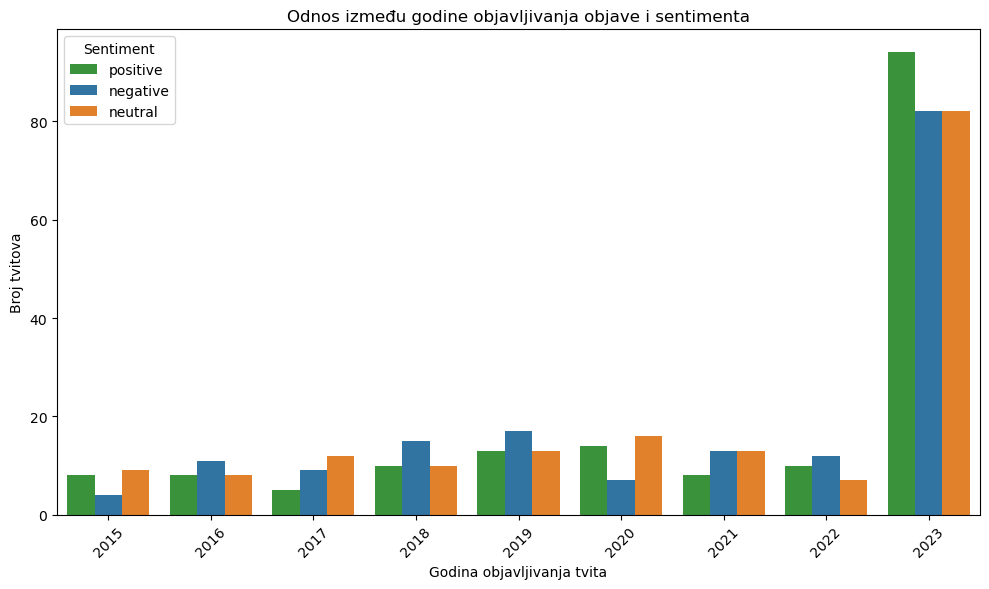

In [245]:
# Definisanje boja za svaki sentiment
sentiment_colors = {'positive': '#2ca02c', 'neutral': '#ff7f0e', 'negative': '#1f77b4'}

# Kreiranje countplot-a sa definisanim bojama za svaki sentiment
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='Year', hue='sentiment', palette=sentiment_colors)
plt.xlabel('Godina objavljivanja tvita')
plt.ylabel('Broj tvitova')
plt.title('Odnos između godine objavljivanja objave i sentimenta')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

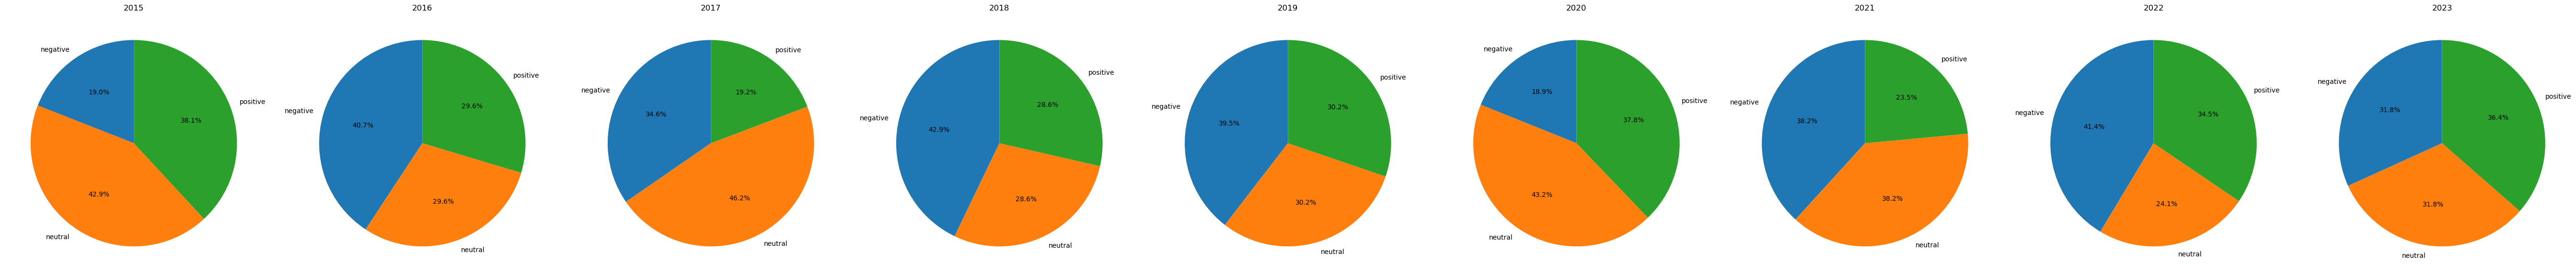

In [246]:
# Kreiranje DataFrame-a koji sadrži broj tvitova za svaku godinu objavljivanja i sentiment
year_sentiment_counts = balanced_df.groupby(['Year', 'sentiment']).size().unstack(fill_value=0)

# Prikaz pie chart-ova za svaku godinu objavljivanja
fig, axs = plt.subplots(nrows=1, ncols=len(year_sentiment_counts.index), figsize=(6 * len(year_sentiment_counts.index), 6))

# Prikaz pie chart-ova za svaku godinu objavljivanja
for i, (time, sentiment_counts) in enumerate(year_sentiment_counts.iterrows()):
    axs[i].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{time}')

plt.tight_layout()
plt.show()

### Analiza odnosa meseca se sentimentom

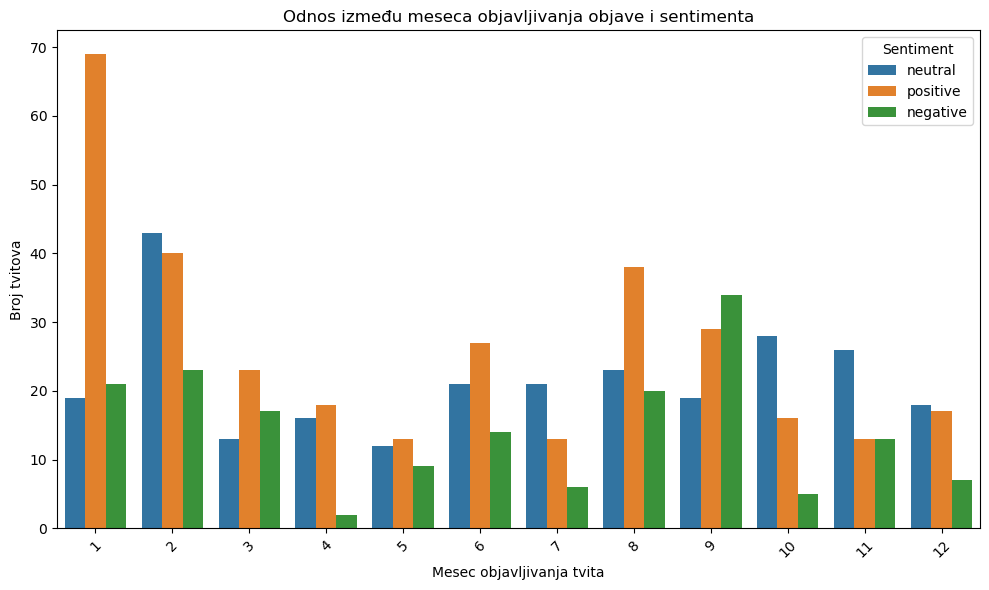

In [247]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='sentiment')
plt.xlabel('Mesec objavljivanja tvita')
plt.ylabel('Broj tvitova')
plt.title('Odnos između meseca objavljivanja objave i sentimenta')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [248]:
# Izračunavanje broja tvitova za svaki sentiment
sentiment_counts = df['sentiment'].value_counts()

# Pronalaženje najmanjeg broja tvitova među svim sentimentima
min_count = sentiment_counts.min()

# Lista za čuvanje izjednačenih podataka
balanced_data = []

# Iteriranje kroz svaki sentiment
for sentiment in df['sentiment'].unique():
    # Odabir slučajnih indeksa za izjednačavanje broja tvitova
    indices = np.random.choice(df[df['sentiment'] == sentiment].index, min_count, replace=False)
    # Dodavanje izjednačenih podataka u listu
    balanced_data.append(df.loc[indices])

# Spajanje izjednačenih podataka u novi DataFrame
balanced_df = pd.concat(balanced_data)

# Prikaz rezultata
print(balanced_df['sentiment'].value_counts())

sentiment
positive    171
negative    171
neutral     171
Name: count, dtype: int64


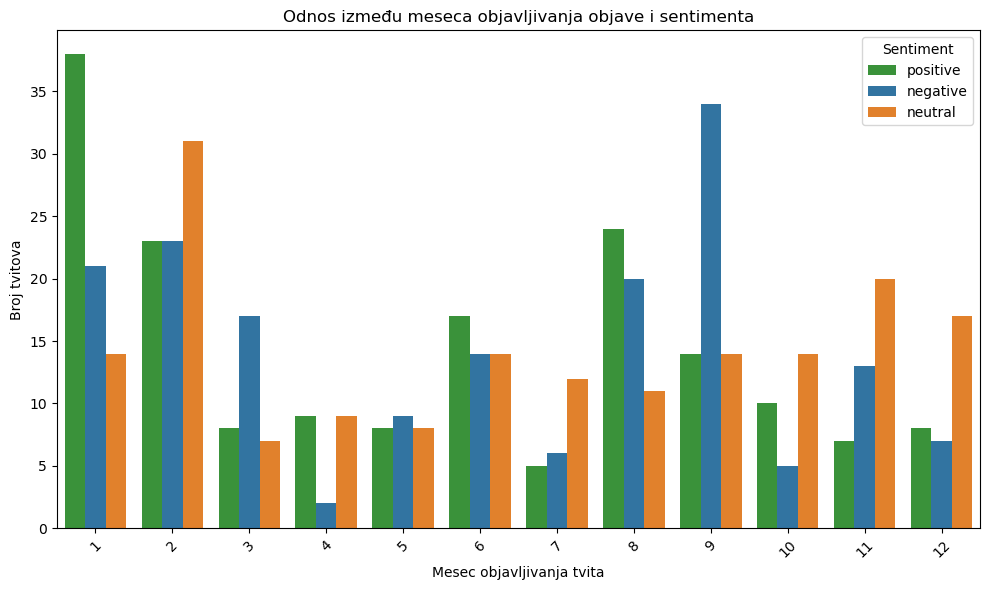

In [249]:
# Definisanje boja za svaki sentiment
sentiment_colors = {'positive': '#2ca02c', 'neutral': '#ff7f0e', 'negative': '#1f77b4'}

# Kreiranje countplot-a sa definisanim bojama za svaki sentiment
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='Month', hue='sentiment', palette=sentiment_colors)
plt.xlabel('Mesec objavljivanja tvita')
plt.ylabel('Broj tvitova')
plt.title('Odnos između meseca objavljivanja objave i sentimenta')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

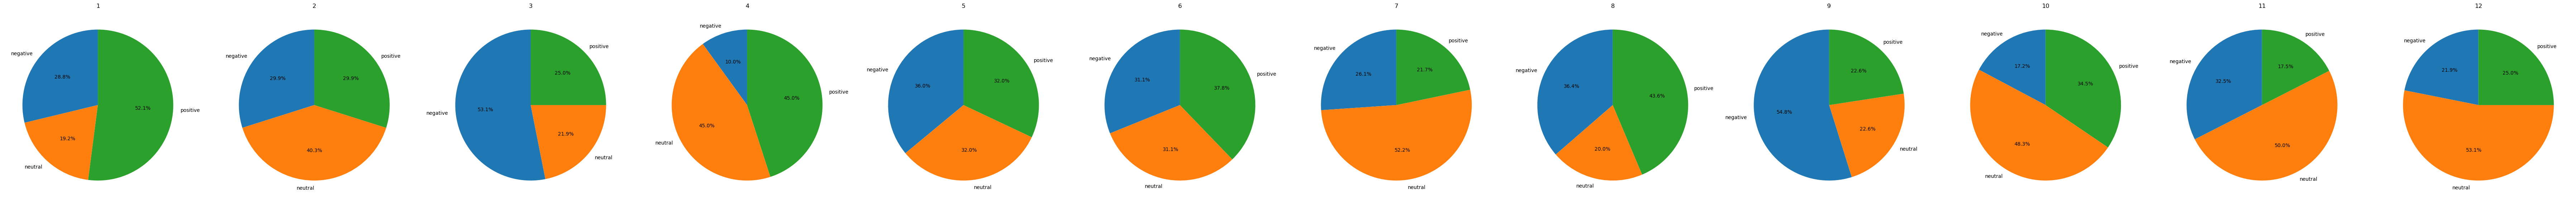

In [250]:
# Kreiranje DataFrame-a koji sadrži broj tvitova za svaku godinu objavljivanja i sentiment
month_sentiment_counts = balanced_df.groupby(['Month', 'sentiment']).size().unstack(fill_value=0)

# Prikaz pie chart-ova za svaku godinu objavljivanja
fig, axs = plt.subplots(nrows=1, ncols=len(month_sentiment_counts.index), figsize=(6 * len(month_sentiment_counts.index), 6))

# Prikaz pie chart-ova za svaku godinu objavljivanja
for i, (time, sentiment_counts) in enumerate(month_sentiment_counts.iterrows()):
    axs[i].pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{time}')

plt.tight_layout()
plt.show()

### Analiza odnosa godine sa platformom

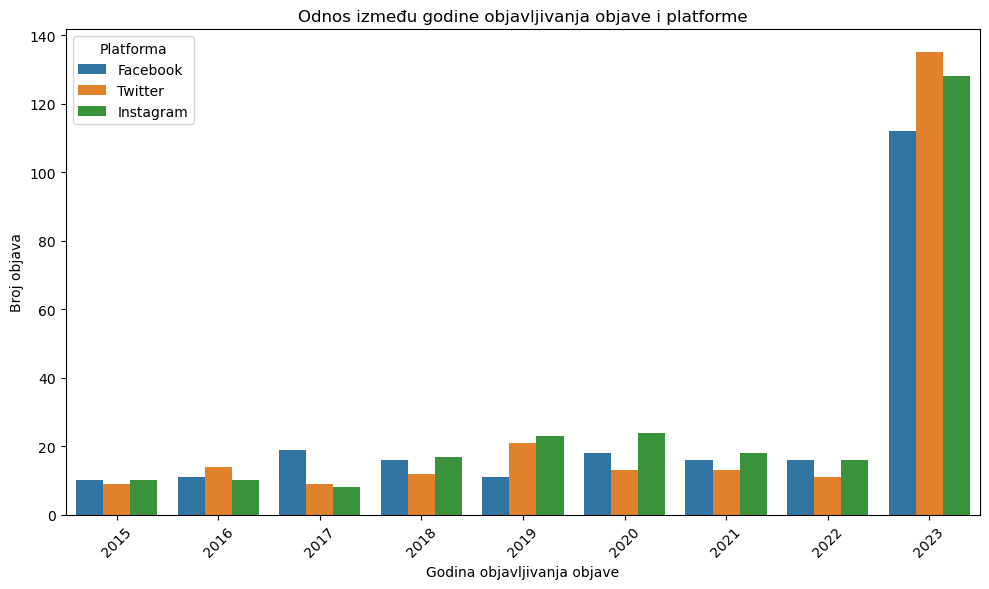

In [251]:
plt.figure(figsize=(10, 6))
sns.countplot(data=newdf, x='Year', hue='Platform')
plt.xlabel('Godina objavljivanja objave')
plt.ylabel('Broj objava')
plt.title('Odnos između godine objavljivanja objave i platforme')
plt.xticks(rotation=45)
plt.legend(title='Platforma')
plt.tight_layout()
plt.show()

In [252]:
# Izračunavanje broja tvitova za svaku platformu
platform_counts = newdf['Platform'].value_counts()

# Pronalaženje najmanjeg broja tvitova među svim platformama
min_count = platform_counts.min()

# Lista za čuvanje izjednačenih podataka
balanced_data = []

# Iteriranje kroz svaku platformu
for platform in newdf['Platform'].unique():
    # Odabir slučajnih indeksa za izjednačavanje broja tvitova
    indices = np.random.choice(newdf[newdf['Platform'] == platform].index, min_count, replace=False)
    # Dodavanje izjednačenih podataka u listu
    balanced_data.append(newdf.loc[indices])

# Spajanje izjednačenih podataka u novi DataFrame
balanced_df = pd.concat(balanced_data)

# Prikaz rezultata
print(balanced_df['Platform'].value_counts())


Platform
Twitter      229
Facebook     229
Instagram    229
Name: count, dtype: int64


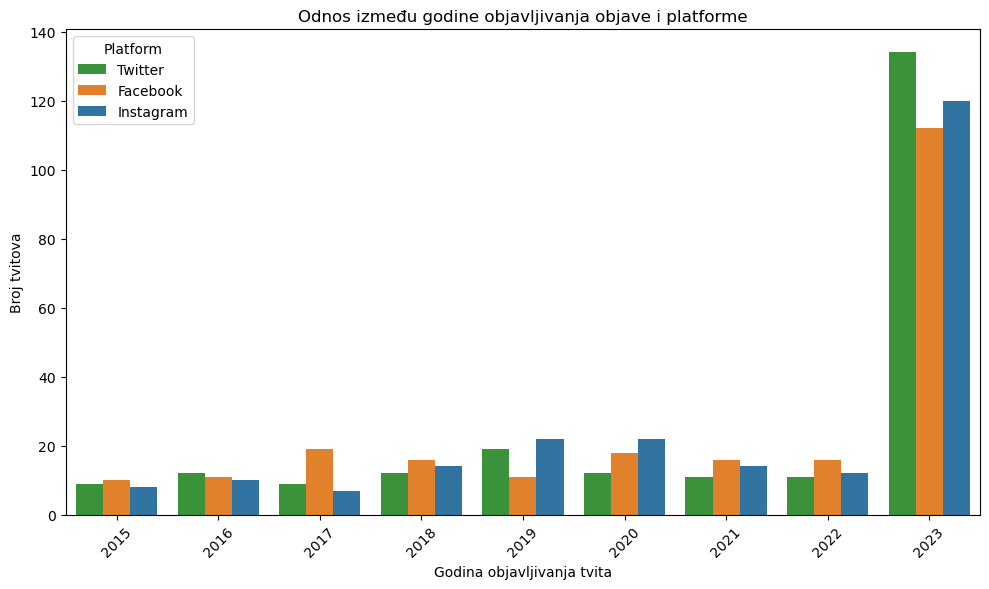

In [253]:
# Definisanje boja za svaku platformu
platform_colors = {'Instagram': '#1f77b4', 'Facebook': '#ff7f0e', 'Twitter': '#2ca02c'}

# Kreiranje countplot-a sa definisanim bojama za svaku platformu
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='Year', hue='Platform', palette=platform_colors)
plt.xlabel('Godina objavljivanja tvita')
plt.ylabel('Broj tvitova')
plt.title('Odnos između godine objavljivanja objave i platforme')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()

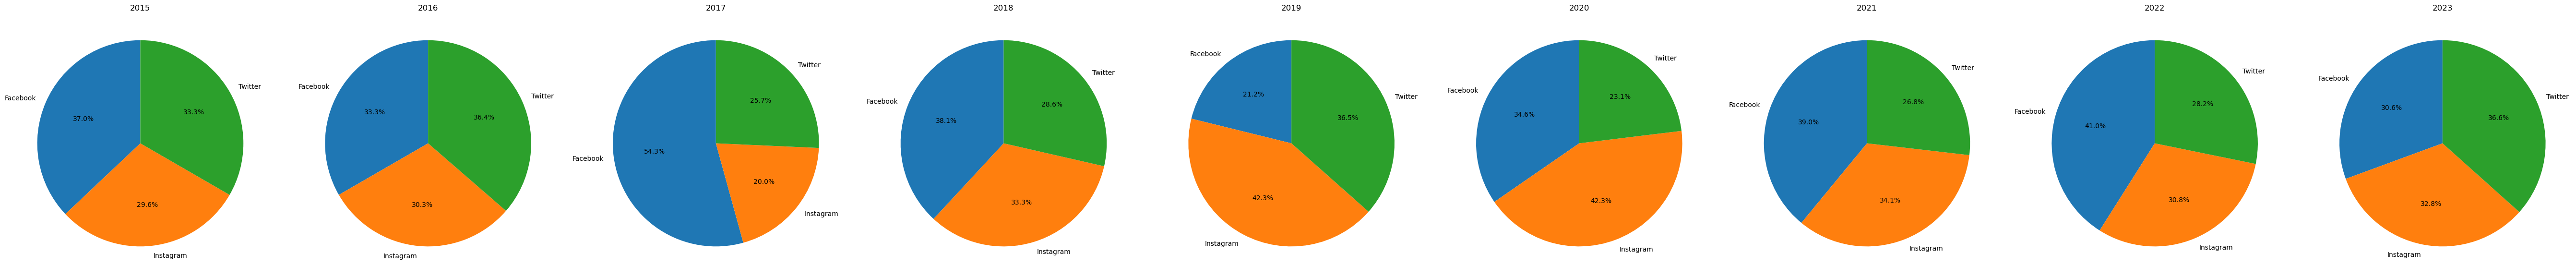

In [254]:
# Kreiranje DataFrame-a koji sadrži broj tvitova za svako vreme objavljivanja i platformu
year_platform_counts = balanced_df.groupby(['Year', 'Platform']).size().unstack(fill_value=0)

# Prikaz pie chart-ova za svako vreme objavljivanja
fig, axs = plt.subplots(nrows=1, ncols=len(year_platform_counts.index), figsize=(6 * len(year_platform_counts.index), 6))

# Prikaz pie chart-ova za svako vreme objavljivanja
for i, (time, platform_counts) in enumerate(year_platform_counts.iterrows()):
    axs[i].pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{time}')

plt.tight_layout()
plt.show()

### Analiza odnosa meseca sa platformom

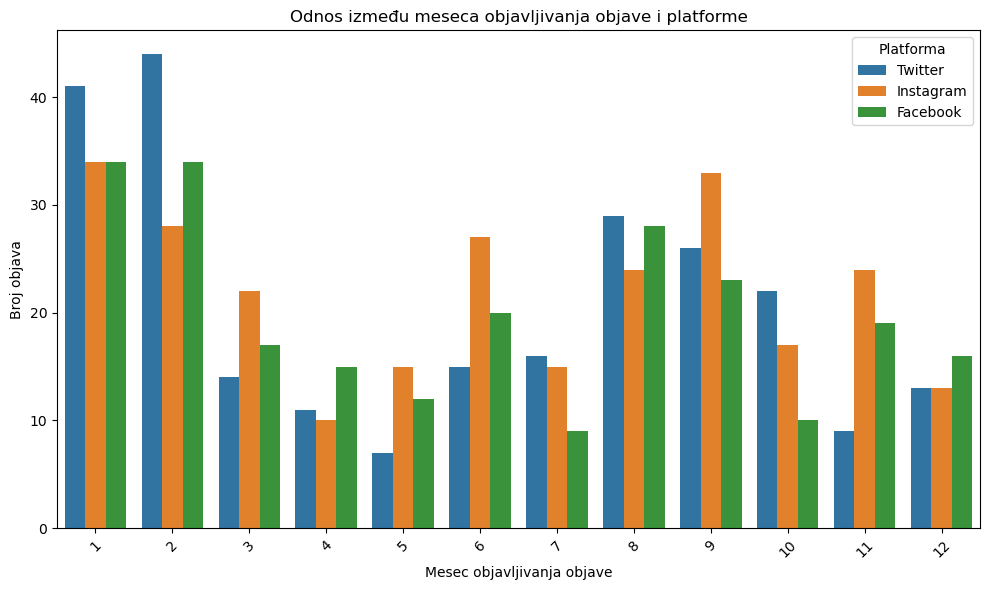

In [255]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Month', hue='Platform')
plt.xlabel('Mesec objavljivanja objave')
plt.ylabel('Broj objava')
plt.title('Odnos između meseca objavljivanja objave i platforme')
plt.xticks(rotation=45)
plt.legend(title='Platforma')
plt.tight_layout()
plt.show()

In [256]:
# Izračunavanje broja tvitova za svaku platformu
platform_counts = df['Platform'].value_counts()

# Pronalaženje najmanjeg broja tvitova među svim platformama
min_count = platform_counts.min()

# Lista za čuvanje izjednačenih podataka
balanced_data = []

# Iteriranje kroz svaku platformu
for platform in df['Platform'].unique():
    # Odabir slučajnih indeksa za izjednačavanje broja tvitova
    indices = np.random.choice(df[df['Platform'] == platform].index, min_count, replace=False)
    # Dodavanje izjednačenih podataka u listu
    balanced_data.append(df.loc[indices])

# Spajanje izjednačenih podataka u novi DataFrame
balanced_df = pd.concat(balanced_data)

# Prikaz rezultata
print(balanced_df['Platform'].value_counts())

Platform
Twitter      237
Facebook     237
Instagram    237
Name: count, dtype: int64


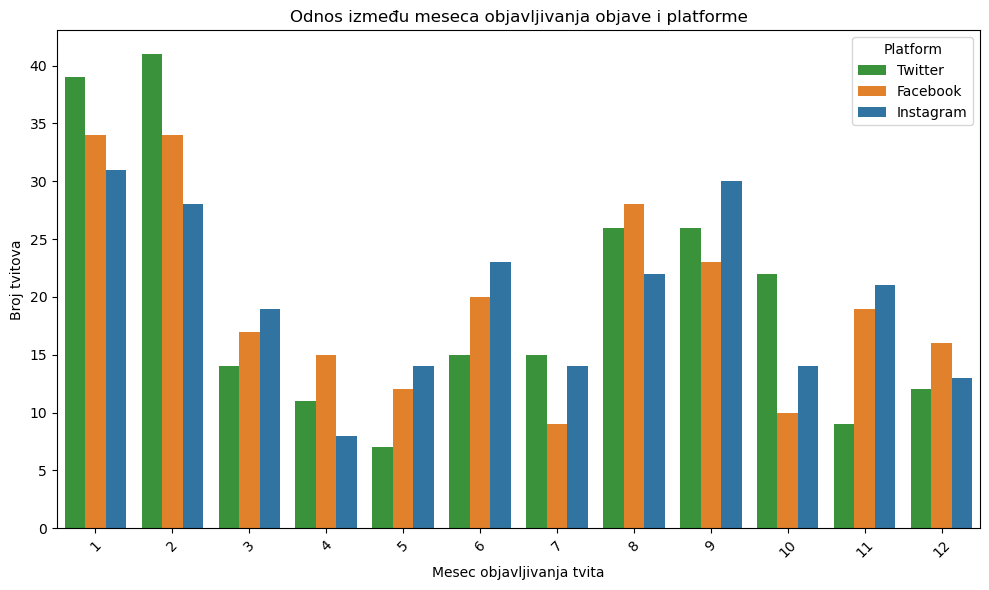

In [257]:
# Definisanje boja za svaku platformu
platform_colors = {'Instagram': '#1f77b4', 'Facebook': '#ff7f0e', 'Twitter': '#2ca02c'}

# Kreiranje countplot-a sa definisanim bojama za svaku platformu
plt.figure(figsize=(10, 6))
sns.countplot(data=balanced_df, x='Month', hue='Platform', palette=platform_colors)
plt.xlabel('Mesec objavljivanja tvita')
plt.ylabel('Broj tvitova')
plt.title('Odnos između meseca objavljivanja objave i platforme')
plt.xticks(rotation=45)
plt.legend(title='Platform')
plt.tight_layout()
plt.show()


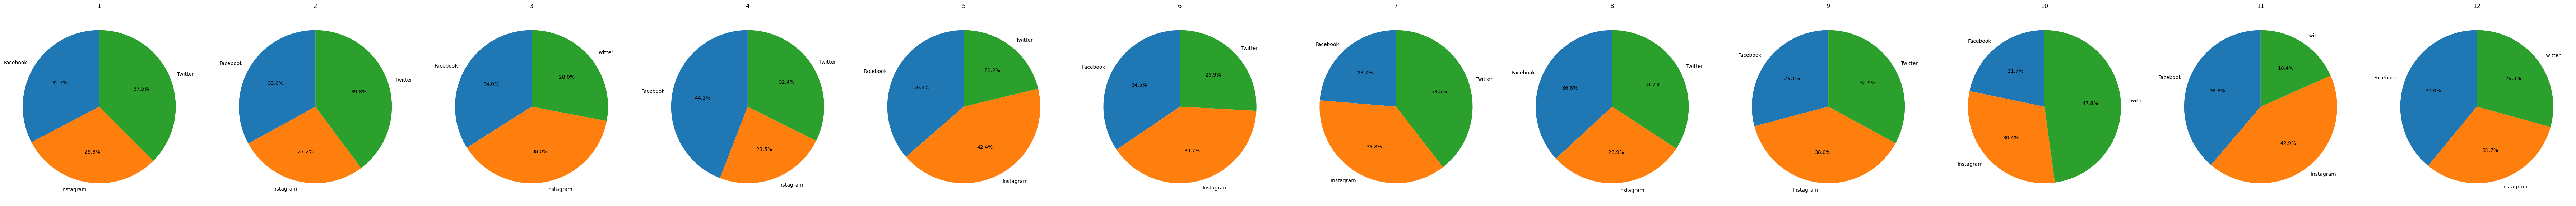

In [258]:
# Kreiranje DataFrame-a koji sadrži broj tvitova za svako vreme objavljivanja i platformu
month_platform_counts = balanced_df.groupby(['Month', 'Platform']).size().unstack(fill_value=0)

# Prikaz pie chart-ova za svako vreme objavljivanja
fig, axs = plt.subplots(nrows=1, ncols=len(month_platform_counts.index), figsize=(6 * len(month_platform_counts.index), 6))

# Prikaz pie chart-ova za svako vreme objavljivanja
for i, (time, platform_counts) in enumerate(month_platform_counts.iterrows()):
    axs[i].pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90)
    axs[i].set_title(f'{time}')

plt.tight_layout()
plt.show()

## Data preprocesing

In [259]:
df.isna().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
text_length      0
dtype: int64

In [260]:
# text cleaning

# conversion to lowercase
df['text']=df['text'].str.lower()

# removal of extra whitespaces
df['text']=df['text'].str.strip()

# check for urls and image links
df[df['text'].str.contains('http')][:10]

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,text_length
236,2021,4,15,night,"it`s a peter & gordon morning -> and i, go to...",neutral,Facebook,136
249,2023,7,4,morning,dang last url went down ? http://blip.fm/~7aigm,negative,Facebook,48
290,2020,11,18,night,http://twitpic.com/4sx96 - before they put a c...,neutral,Facebook,131
299,2017,12,22,night,the little wormy from labyrinth sadly passed a...,neutral,Facebook,138
329,2015,11,10,night,http://twitpic.com/4wukt - we bought ludi her ...,positive,Facebook,72


In [261]:
import re
import string
def remove_html(text: str):
     text = text.replace("href", "")
     text = text.replace("www", "")
     text = text.replace("src", "")
     text = text.replace("alt", "")
     text = text.replace("img", "")
     try:
          # kako posle slike ima naziv slike mi brisemo sve nakon http
          index_found = text.index("http")
          return text[:index_found]
     except ValueError:
          return text

def remove_common(text: str):
     text = text.replace(" like ", " ")
     text = text.replace(" im ", " ")
     text = text.replace("im ", " ")
     text = text.replace(" really ", " ")
     text = text.replace(" feel ", " ")
     text = text.replace(" feeling ", " ")
     text = text.replace(" i ", " ")
     text = text.replace("i ", " ")
     return text.replace(" target blank ", " ")

def remove_punctuation(text: str):
    # Make a regular expression that matches all punctuation
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    # Use the regex
    return regex.sub('', text)



df['text']=df['text'].apply(remove_html)
df['text']=df['text'].apply(remove_common)
df['text']=df['text'].apply(remove_punctuation)


df[df['text'].str.contains('http')]

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,text_length


In [262]:
def expand(text: str):
   text = text.replace(" let's ", " let us ")
   text = text.replace("'s ", " is ")
   text = text.replace("n't ", " not ")
   text = text.replace(" n't ", " not ")
   text = text.replace("'ve ", " have ")
   text = text.replace("'d ", " did ")
   text = text.replace("'ll ", " will ")
   text = text.replace("'m ", " am ")
   text = text.replace("'re ", " are ")
   text = text.replace(" y'all ", " you all ")
   text = text.replace(" dont ", " do not ")
   text = text.replace(" lets ", " let us ")
   return text.replace(" target blank ", " ")

df['text'] = df['text'].apply(expand)

In [263]:
import emoji

def is_emoji(text):
    return emoji.demojize(text)

df['text'].apply(is_emoji)

0                           what a great day looks dream
1                   sorry miss you here in the sea beach
2                                          dont angry me
3      we attend in the class just for listening teac...
4                       those who want to go let them go
                             ...                        
741    creating a beautiful mural with fellow art ent...
742    participating in a schoolwide art exhibition w...
743    achieving a personal best in a track and field...
744    collaborating on a science project that receiv...
745    successfully fundraising for a school charity ...
Name: text, Length: 746, dtype: object

In [264]:
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

def replace_chat_words(text):
    words=text.split()
    for i, word in enumerate(words):
        if word.upper() in chat_words:
            words[i]=chat_words[word.upper()].lower()
    return ' '.join(words)
df['text']=df['text'].apply(replace_chat_words)

In [265]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

print(sorted(set(stopwords.words("english"))))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\milos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [266]:
stop_words=set(stopwords.words('english'))
def remove_stopwords(text):
    words=text.split()
    filtered_words=[word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['text']=df['text'].apply(remove_stopwords)
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,text_length
0,2018,8,18,morning,great day looks dream,positive,Twitter,37
1,2018,8,18,noon,sorry miss sea beach,positive,Facebook,46
2,2017,8,18,night,dont angry,negative,Facebook,14
3,2022,6,8,morning,attend class listening teachers reading slide ...,negative,Facebook,84
4,2022,6,8,noon,want go let go,negative,Instagram,33


In [267]:
from spellchecker import SpellChecker

# Inicijalizacija SpellChecker objekta
spell_checker = SpellChecker()

def spell_check_text(text):
    words = text.split()
    corrected_words = []
    for word in words:
        corrected_word = spell_checker.correction(word)
        if corrected_word is not None:
            corrected_words.append(corrected_word)
        else:
            corrected_words.append(word)  # Dodaj originalnu reč ako nije moguće ispraviti
    corrected_text = ' '.join(corrected_words)
    return corrected_text

df['text'] = df['text'].apply(spell_check_text)


In [268]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,text_length
0,2018,8,18,morning,great day looks dream,positive,Twitter,37
1,2018,8,18,noon,sorry miss sea beach,positive,Facebook,46
2,2017,8,18,night,don't angry,negative,Facebook,14
3,2022,6,8,morning,attend class listening teachers reading slide ...,negative,Facebook,84
4,2022,6,8,noon,want go let go,negative,Instagram,33


In [269]:
from nltk.stem import PorterStemmer
porter_stemmer=PorterStemmer()
df['Text_Stemmed']=df['text'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,text_length,Text_Stemmed
0,2018,8,18,morning,great day looks dream,positive,Twitter,37,great day look dream
1,2018,8,18,noon,sorry miss sea beach,positive,Facebook,46,sorri miss sea beach
2,2017,8,18,night,don't angry,negative,Facebook,14,don't angri
3,2022,6,8,morning,attend class listening teachers reading slide ...,negative,Facebook,84,attend class listen teacher read slide nonsens
4,2022,6,8,noon,want go let go,negative,Instagram,33,want go let go


In [270]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,text_length,Text_Stemmed
0,2018,8,18,morning,great day looks dream,positive,Twitter,37,great day look dream
1,2018,8,18,noon,sorry miss sea beach,positive,Facebook,46,sorri miss sea beach
2,2017,8,18,night,don't angry,negative,Facebook,14,don't angri
3,2022,6,8,morning,attend class listening teachers reading slide ...,negative,Facebook,84,attend class listen teacher read slide nonsens
4,2022,6,8,noon,want go let go,negative,Instagram,33,want go let go


In [271]:
df.isna().sum()

Year             0
Month            0
Day              0
Time of Tweet    0
text             0
sentiment        0
Platform         0
text_length      0
Text_Stemmed     0
dtype: int64

In [272]:
def count_empty_strings(df):
    empty_counts = {}
    for column in df.columns:
        empty_count = df[column].apply(lambda x: isinstance(x, str) and x == "").sum()
        empty_counts[column] = empty_count
    return empty_counts

In [273]:
count_empty_strings(df)

{'Year': 0,
 'Month': 0,
 'Day': 0,
 'Time of Tweet': 0,
 'text': 4,
 'sentiment': 0,
 'Platform': 0,
 'text_length': 0,
 'Text_Stemmed': 4}

In [274]:
df = df[df['Text_Stemmed'] != ""]

In [275]:
count_empty_strings(df)

{'Year': 0,
 'Month': 0,
 'Day': 0,
 'Time of Tweet': 0,
 'text': 0,
 'sentiment': 0,
 'Platform': 0,
 'text_length': 0,
 'Text_Stemmed': 0}

In [277]:
df.to_csv('preprocessed.csv', index=False)

In [158]:
# Define the path to the CSV file
file_path = 'preprocessed.csv'

# Read the CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()


,Year,Month,Day,Time of Tweet,text,sentiment,Platform,text_length,Text_Stemmed
0,2018,8,18,morning,great day looks dream,positive,Twitter,37,great day look dream
1,2018,8,18,noon,sorry miss sea beach,positive,Facebook,46,sorri miss sea beach
2,2017,8,18,night,don't angry,negative,Facebook,14,don't angri
3,2022,6,8,morning,attend class listening teachers reading slide ...,negative,Facebook,84,attend class listen teacher read slide nonsens
4,2022,6,8,noon,want go let go,negative,Instagram,33,want go let go


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 745
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           742 non-null    int64 
 1   Month          742 non-null    int64 
 2   Day            742 non-null    int64 
 3   Time of Tweet  742 non-null    object
 4   text           742 non-null    object
 5   sentiment      742 non-null    object
 6   Platform       742 non-null    object
 7   text_length    742 non-null    int64 
 8   Text_Stemmed   742 non-null    object
dtypes: int64(4), object(5)
memory usage: 58.0+ KB


## Word Cloud

Ovaj kod koristi Matplotlib za generisanje WordCloud-ova za svaku emociju iz DataFrame-a df. Svaki WordCloud odgovara jednoj emociji.

WordCloud je vizuelna reprezentacija teksta u kojoj se reči prikazuju na osnovu njihove frekvencije pojavljivanja. Često se koristi za vizualizaciju najčešćih reči u tekstu ili skupu tekstova. U WordCloud-u, češće reči se obično prikazuju sa većom veličinom fonta, dok ređe reči imaju manju veličinu fonta.

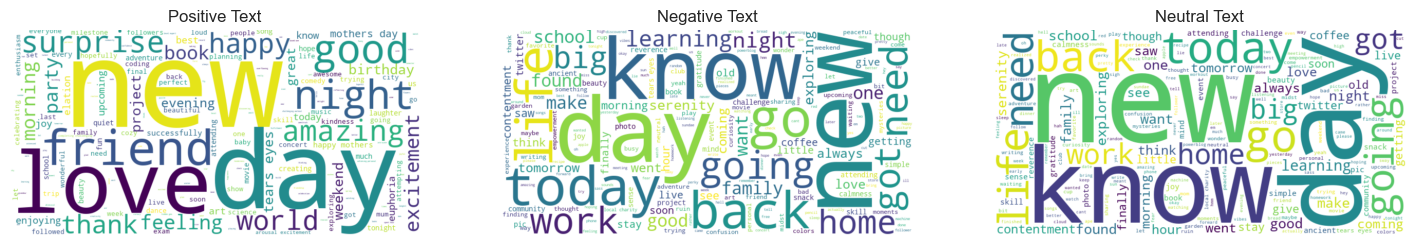

In [331]:
from wordcloud import WordCloud

# Make Seperate Data Set to Visualize text 
# Positive
df_positive = df[df['sentiment']=='positive']
# Negative
df_negative = df[df['sentiment']=='negative']
# Neutral
df_neutral = df[df['sentiment']=='neutral']


# Combine text from different categories
combined_positive_text = ' '.join(df_positive['text'])
combined_negative_text = ' '.join(df_neutral['text'])
combined_neutral_text = ' '.join(df_neutral['text'])


# Create word clouds
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_negative_text)
neutral_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_neutral_text)

# Plot the word clouds
plt.figure(figsize=(18, 9))

plt.subplot(2, 3, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Text')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Text')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(neutral_wordcloud, interpolation='bilinear')
plt.title('Neutral Text')
plt.axis('off')

#plt.tight_layout()
plt.show()

Ovaj kod generiše 8 subplot-ova, prikazujući za svaku od 6 emocija (sadness, joy, love, anger, fear, surprise) top 25 reči na osnovu frekvencije pojavljivanja u tekstu. Za svaku emociju, izdvaja se odgovarajući podskup podataka iz DataFrame-a df, a zatim se za taj podskup teksta izračunava frekvencija reči. Nakon toga, kreiraju se tabele sa top 25 reči za svaku emociju, pri čemu se svaka tabela nalazi u svom subplot-u. Iznad svake tabele se nalazi naslov koji navodi emociju. Na kraju, sve tabele su prikazane u jednoj figuri.

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jovana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


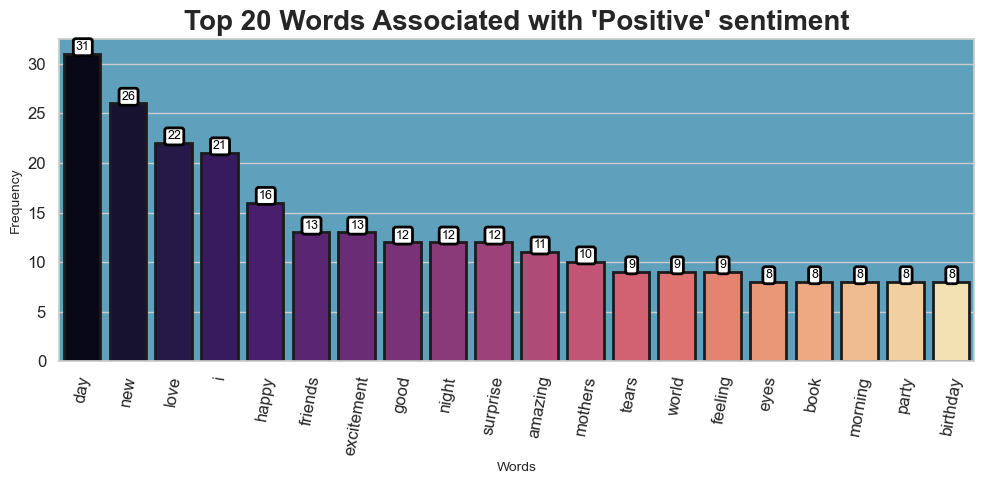

In [332]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter

positive_texts = df[df['sentiment'] == 'positive']['text']

# Tokenize the text and count the frequency of each word
words = [word.lower() for text in positive_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Positive' sentiment", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

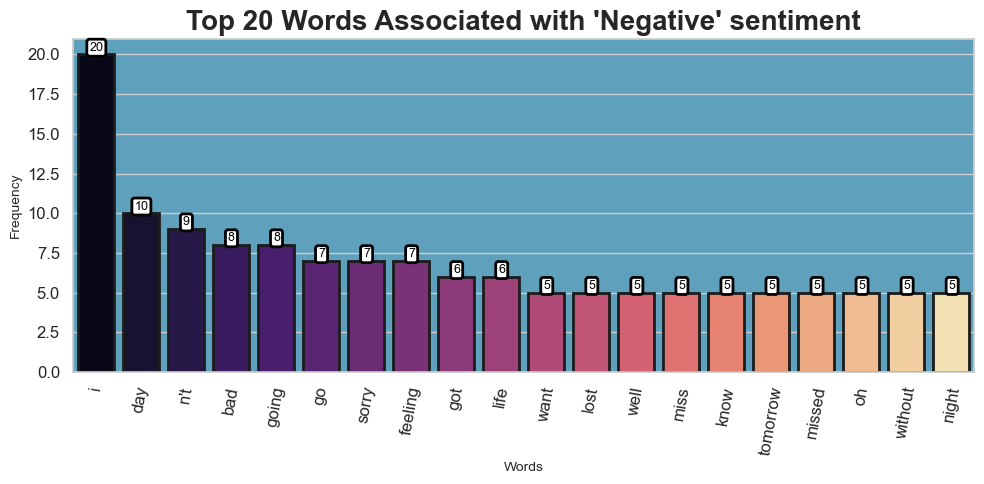

In [333]:
from nltk.tokenize import word_tokenize
from collections import Counter

negative_texts = df[df['sentiment'] == 'negative']['text']

# Tokenize the text and count the frequency of each word
words = [word.lower() for text in negative_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Negative' sentiment", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

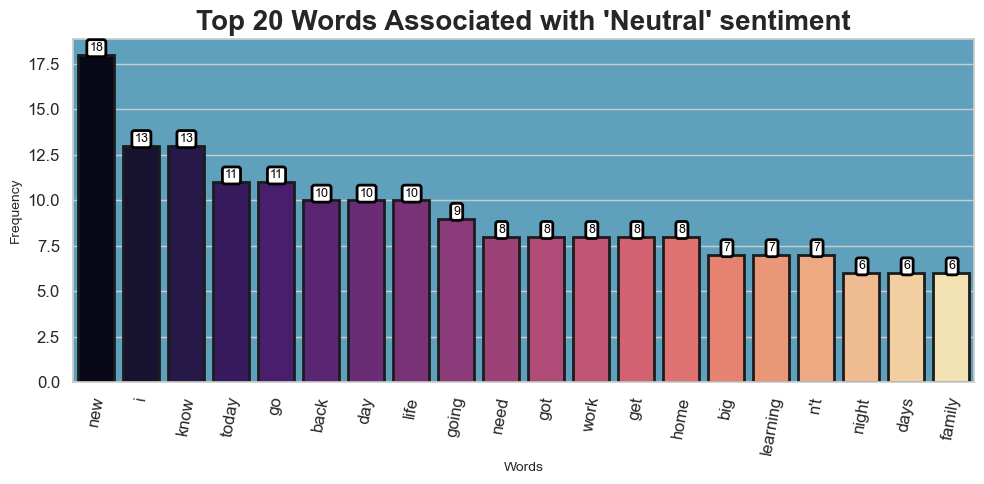

In [334]:
from nltk.tokenize import word_tokenize
from collections import Counter

neutral_texts = df[df['sentiment'] == 'neutral']['text']

# Tokenize the text and count the frequency of each word
words = [word.lower() for text in neutral_texts for word in word_tokenize(text)]
word_freq = Counter(words)

# Get the top 20 words
top_20_words = dict(word_freq.most_common(20))

# Set the background color and theme
background_color = '#5fa1bc'
sns.set_theme(style="whitegrid", rc={"axes.facecolor": background_color})

# Create a bar plot
plt.figure(figsize=(10, 5))
p = sns.barplot(x=list(top_20_words.keys()), y=list(top_20_words.values()), palette='magma', edgecolor='#1c1c1c', linewidth=2)
for container in p.containers:
    plt.bar_label(container, label_type="edge", color="black", fontsize=9, padding=6, position=(0.5, 0.5),
                  bbox={"boxstyle": "round", "pad": 0.2, "facecolor": "white", "edgecolor": "black", "linewidth": 2, "alpha": 1})
plt.title("Top 20 Words Associated with 'Neutral' sentiment", fontsize=20, fontweight='bold')
plt.xlabel("Words", fontsize=10 )
plt.ylabel("Frequency", fontsize=10)
plt.xticks(rotation=80, fontsize=12,)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [335]:
df.duplicated().sum()

0

In [336]:
df = df.drop_duplicates()
df.duplicated().sum()

0

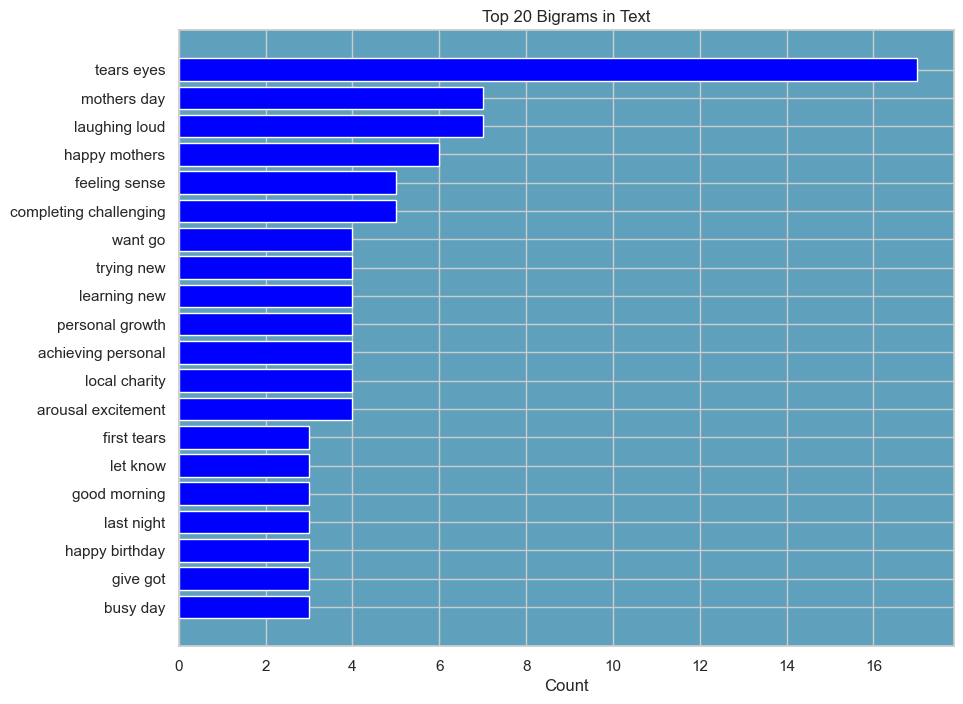

In [337]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_bigram(corpus, n=20):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_bigrams = get_top_n_bigram(df['text'], 20)

df_bigrams = pd.DataFrame(common_bigrams, columns=['bigram', 'count'])

plt.figure(figsize=(10, 8))
plt.barh(df_bigrams['bigram'], df_bigrams['count'], color='blue')
plt.xlabel('Count')
plt.title('Top 20 Bigrams in Text')
plt.gca().invert_yaxis()
plt.show()

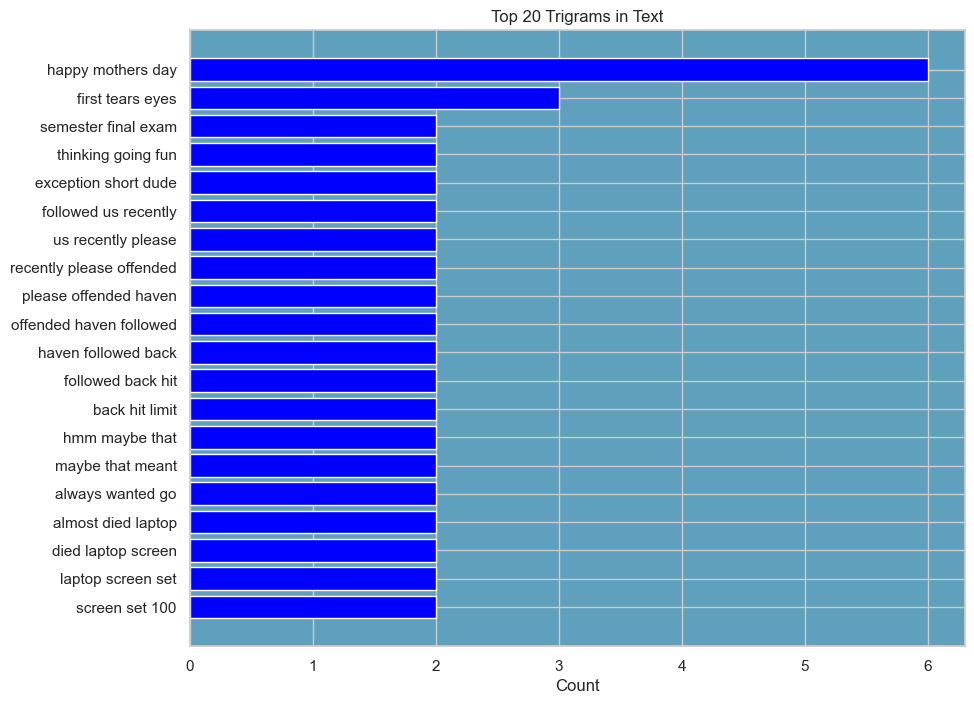

In [338]:
def get_top_n_trigram(corpus, n=20):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_trigrams = get_top_n_trigram(df['text'], 20)

df_trigrams = pd.DataFrame(common_trigrams, columns=['trigram', 'count'])

plt.figure(figsize=(10, 8))
plt.barh(df_trigrams['trigram'], df_trigrams['count'], color='blue')
plt.xlabel('Count')
plt.title('Top 20 Trigrams in Text')
plt.gca().invert_yaxis()
plt.show()

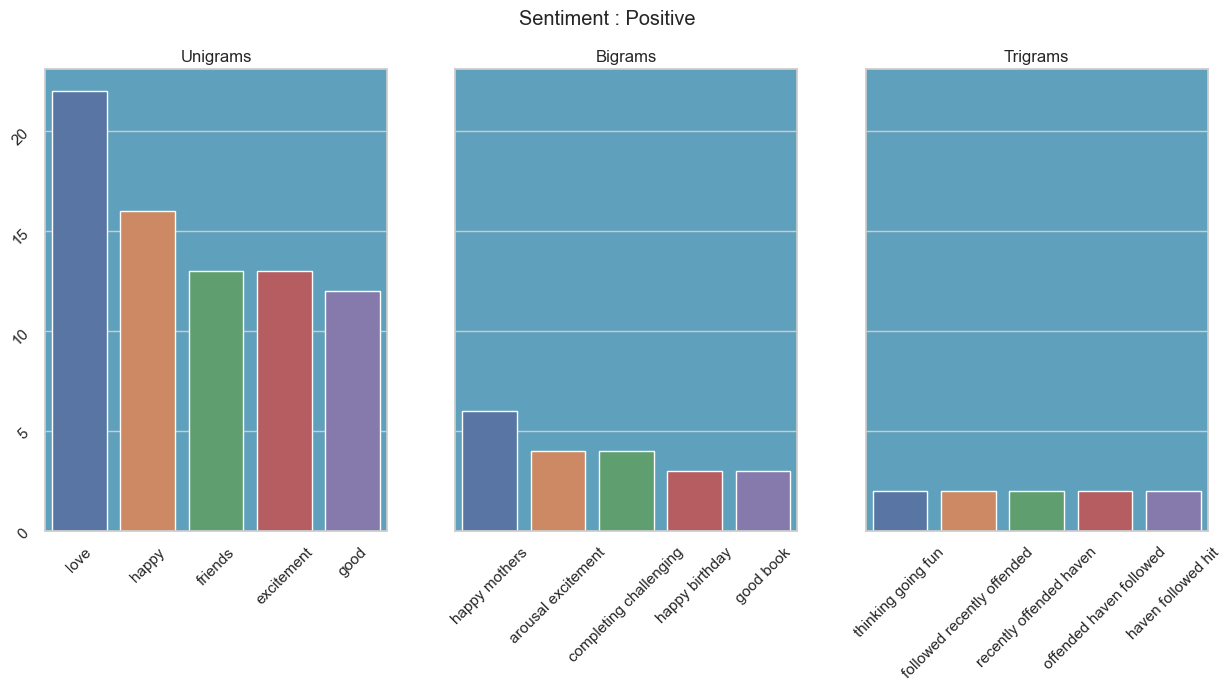

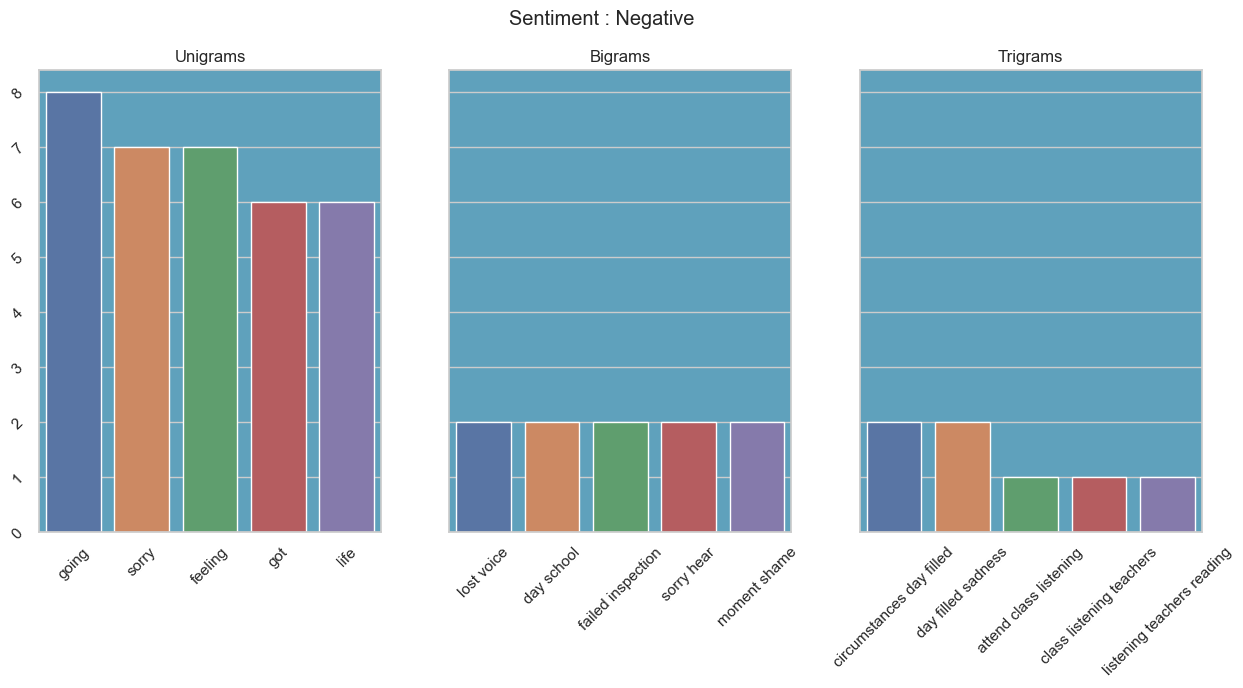

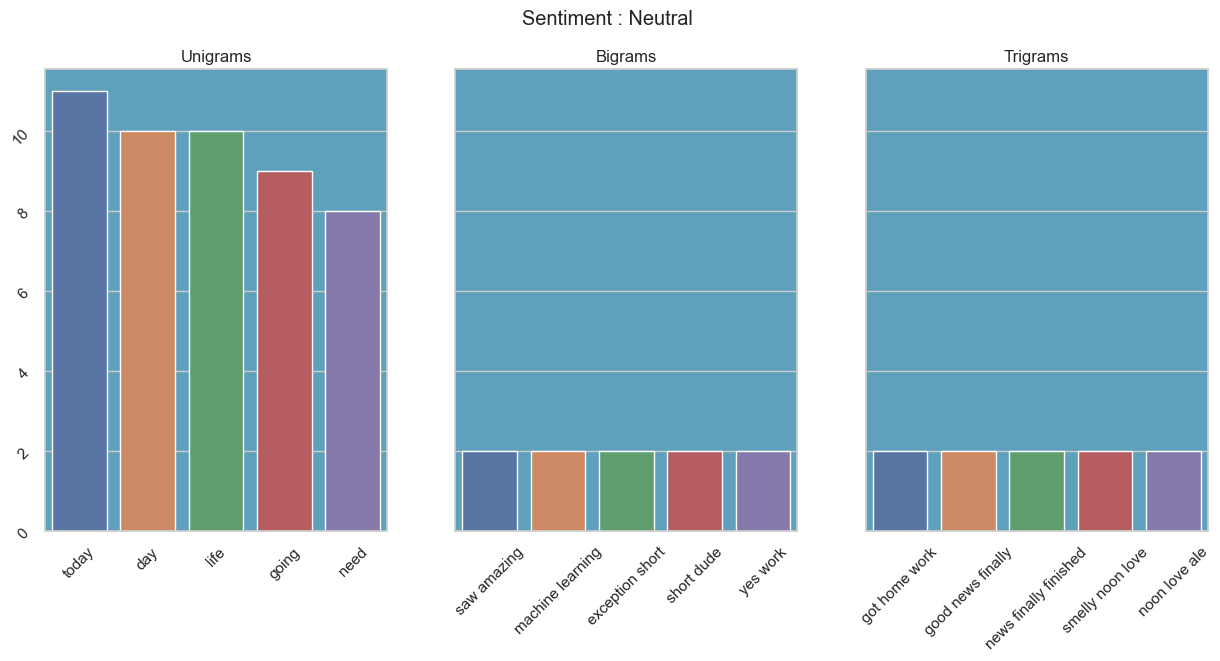

In [339]:
positive = df[df['sentiment']=='positive']['text']
negative = df[df['sentiment']=='negative']['text']
neutral = df[df['sentiment']=='neutral']['text']


from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


pos_unigrams = get_top_n_gram(positive.values,(1,1),7)[2:]
neg_unigrams= get_top_n_gram(negative.values,(1,1),7)[2:]
neu_unigrams= get_top_n_gram(neutral.values,(1,1),7)[2:]

pos_bigrams = get_top_n_gram(positive.values,(2,2),7)[2:]
neg_bigrams= get_top_n_gram(negative.values,(2,2),7)[2:]
neu_bigrams= get_top_n_gram(neutral.values,(2,2),7)[2:]

pos_trigrams = get_top_n_gram(positive.values,(3,3),7)[2:]
neg_trigrams= get_top_n_gram(negative.values,(3,3),7)[2:]
neu_trigrams= get_top_n_gram(neutral.values,(3,3),7)[2:]

# Positive
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Sentiment : Positive')

sns.barplot(x=[x[0] for x in pos_unigrams], y=[x[1] for x in pos_unigrams], ax=axes[0])
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=[x[0] for x in pos_bigrams], y=[x[1] for x in pos_bigrams], ax=axes[1])
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=[x[0] for x in pos_trigrams], y=[x[1] for x in pos_trigrams], ax=axes[2])
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

# Negative
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Sentiment : Negative')

sns.barplot(x=[x[0] for x in neg_unigrams], y=[x[1] for x in neg_unigrams], ax=axes[0])
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=[x[0] for x in neg_bigrams], y=[x[1] for x in neg_bigrams], ax=axes[1])
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=[x[0] for x in neg_trigrams], y=[x[1] for x in neg_trigrams], ax=axes[2])
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)

# Neutral
fig, axes = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
fig.suptitle('Sentiment : Neutral')

sns.barplot(x=[x[0] for x in neu_unigrams], y=[x[1] for x in neu_unigrams], ax=axes[0])
axes[0].set_title('Unigrams')
axes[0].tick_params(labelrotation=45)

sns.barplot(x=[x[0] for x in neu_bigrams], y=[x[1] for x in neu_bigrams], ax=axes[1])
axes[1].set_title('Bigrams')
axes[1].tick_params(labelrotation=45)

sns.barplot(x=[x[0] for x in neu_trigrams], y=[x[1] for x in neu_trigrams], ax=axes[2])
axes[2].set_title('Trigrams')
axes[2].tick_params(labelrotation=45)


In [340]:
df.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform,text_length,Text_Stemmed
0,2018,8,18,morning,great day looks dream,positive,Twitter,37,great day look dream
1,2018,8,18,noon,sorry miss sea beach,positive,Facebook,46,sorri miss sea beach
2,2017,8,18,night,don't angry,negative,Facebook,14,don't angri
3,2022,6,8,morning,attend class listening teachers reading slide ...,negative,Facebook,84,attend class listen teacher read slide nonsens
4,2022,6,8,noon,want go let go,negative,Instagram,33,want go let go


**Tokenizacija**

In [341]:
from gensim.utils import simple_preprocess

# Definišemo funkciju za tokenizaciju teksta
def tokenize_text(text):
    return simple_preprocess(text)

# Tokenizujemo tekst u koloni "Text_Stemmed" i dodajemo rezultat u novu kolonu "Tokens"
df['Tokens'] = df['Text_Stemmed'].apply(tokenize_text)

# Prikazujemo rezultat
print(df[['Text_Stemmed', 'Tokens']])

                                          Text_Stemmed  \
0                                 great day look dream   
1                                 sorri miss sea beach   
2                                          don't angri   
3       attend class listen teacher read slide nonsens   
4                                       want go let go   
..                                                 ...   
741  creat beauti mural fellow art enthusiast power...   
742  particip schoolkid art exhibit wit creativ spr...   
743  achiev person best track field competit thrill...   
744  collabor scienc project receiv recognit region...   
745  success fundrais school chariti initi joy give...   

                                                Tokens  
0                            [great, day, look, dream]  
1                            [sorri, miss, sea, beach]  
2                                         [don, angri]  
3    [attend, class, listen, teacher, read, slide, ...  
4                 

**Word embeddings**

In [342]:
from gensim.models import Word2Vec

# Definišemo model Word2Vec
model = Word2Vec(sentences=df['Tokens'], vector_size=100, window=5, min_count=1, sg=0)

# Prikazujemo embedding vektore za neke reči
print("Embedding vektor za reč 'great':", model.wv['great'])
print("Embedding vektor za reč 'day':", model.wv['day'])

# Čuvamo obučeni model ako je potrebno
model.save("word2vec_model")

# Možemo kasnije ponovo učitati model
# loaded_model = Word2Vec.load("word2vec_model")

Embedding vektor za reč 'great': [-3.4038725e-04  3.6892800e-03 -6.6170380e-03  7.4119484e-03
 -4.8001907e-03 -6.8414914e-03  5.1345020e-03 -4.3376349e-03
 -3.4431720e-03 -8.3211539e-03 -2.7306450e-03 -1.0010045e-02
  3.8802056e-03 -4.3759155e-03  1.9658920e-04 -1.1975295e-03
 -7.8977589e-03 -9.2932563e-03  3.1779541e-03 -7.5766593e-03
  7.4231122e-03  3.7748823e-03  4.1842572e-03  7.1259825e-03
  3.0505431e-03 -9.3414523e-03 -2.8178734e-03  5.1186285e-03
 -1.3981982e-03 -3.7520719e-03  2.4588408e-03 -1.6402273e-03
  5.9410986e-03  9.0236170e-03 -4.9278727e-03 -2.5815445e-03
  9.3497084e-03 -6.2372391e-03  1.8732649e-03  6.2244246e-03
  4.9246266e-03 -5.8705201e-03 -1.8981402e-03  2.5423733e-03
  6.4246166e-03  2.0312329e-03  2.9644390e-04 -6.9161919e-03
  1.0147626e-02  5.9174644e-03  8.5879965e-03  2.7110002e-03
  9.0524377e-03 -8.1904195e-03 -8.9170234e-03  4.9654841e-03
  8.5079490e-04 -2.6322636e-03 -7.8311441e-03 -3.1749026e-03
 -8.0856407e-04  4.9828873e-03  3.5283393e-03 -9.309

In [343]:
similar_words = model.wv.most_similar("tear")
print(similar_words)



[('equat', 0.33379992842674255), ('happi', 0.32932910323143005), ('afternoon', 0.3180496394634247), ('bake', 0.3070349395275116), ('resist', 0.28401046991348267), ('transsiberian', 0.272071897983551), ('feet', 0.2629542648792267), ('write', 0.26050642132759094), ('blanket', 0.2543298006057739), ('ink', 0.2525942623615265)]


In [344]:
similar_words = model.wv.most_similar("sad")
print(similar_words)

[('huge', 0.29404616355895996), ('except', 0.28689369559288025), ('that', 0.28323131799697876), ('doesn', 0.276745080947876), ('mess', 0.2742997407913208), ('effort', 0.2731490731239319), ('permit', 0.27115628123283386), ('playlet', 0.25837719440460205), ('vita', 0.25755617022514343), ('gem', 0.2560952305793762)]


DATA PREPARATION


In [345]:
df2 = df.copy()

In [346]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix

In [347]:
X = df2['text'].values
y = df2['sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [348]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

PASSIVE AGGRESIVE CLASSIFIER

In [349]:
pac_classifier = PassiveAggressiveClassifier(max_iter=50, random_state=42)
pac_classifier.fit(X_train_tfidf, y_train)

PassiveAggressiveClassifier(max_iter=50, random_state=42)

In [350]:
y_pred = pac_classifier.predict(X_test_tfidf)
accuracy_test = accuracy_score(y_test, y_pred)
classification_rep_test = classification_report(y_test, y_pred)

In [351]:
print("Test Set Results:")
print(f"Accuracy: {accuracy_test}")
print("Classification Report:\n", classification_rep_test)

Test Set Results:
Accuracy: 0.5848214285714286
Classification Report:
               precision    recall  f1-score   support

    negative       0.68      0.49      0.57        57
     neutral       0.49      0.58      0.53        73
    positive       0.63      0.65      0.64        94

    accuracy                           0.58       224
   macro avg       0.60      0.57      0.58       224
weighted avg       0.60      0.58      0.59       224



LOGISTIC CLASSIFIER

In [352]:
logistic_classifier = LogisticRegression(max_iter=50, random_state=42)
logistic_classifier.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=50, random_state=42)

In [353]:
y_pred_logistic = logistic_classifier.predict(X_test_tfidf)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
classification_rep_logistic = classification_report(y_test, y_pred_logistic)

In [354]:
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic)

Logistic Regression Results:
Accuracy: 0.5
Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.11      0.18        57
     neutral       0.46      0.47      0.46        73
    positive       0.51      0.77      0.61        94

    accuracy                           0.50       224
   macro avg       0.55      0.45      0.42       224
weighted avg       0.53      0.50      0.45       224



RANDOM FOREST CLASSIFIER

In [355]:
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [356]:
y_pred_rf = random_forest_classifier.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

In [357]:
print("\nRandom Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rep_rf)


Random Forest Results:
Accuracy: 0.5357142857142857
Classification Report:
               precision    recall  f1-score   support

    negative       0.67      0.14      0.23        57
     neutral       0.48      0.58      0.53        73
    positive       0.56      0.74      0.64        94

    accuracy                           0.54       224
   macro avg       0.57      0.49      0.47       224
weighted avg       0.56      0.54      0.50       224



SVM CLASSIFIER

In [358]:
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_tfidf, y_train)

SVC(random_state=42)

In [359]:
y_pred_svm = svm_classifier.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

In [360]:
print("Support Vector Machine Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm)

Support Vector Machine Results:
Accuracy: 0.4955357142857143
Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.02      0.03        57
     neutral       0.55      0.40      0.46        73
    positive       0.48      0.86      0.61        94

    accuracy                           0.50       224
   macro avg       0.67      0.43      0.37       224
weighted avg       0.63      0.50      0.42       224



MULTINOMINAL NB


In [361]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

MultinomialNB()

In [362]:
y_pred_nb = nb_classifier.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

In [363]:
print("\nMultinomial Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb}")
print("Classification Report:\n", classification_rep_nb)


Multinomial Naive Bayes Results:
Accuracy: 0.5267857142857143
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.11      0.18        57
     neutral       0.51      0.51      0.51        73
    positive       0.52      0.80      0.63        94

    accuracy                           0.53       224
   macro avg       0.59      0.47      0.44       224
weighted avg       0.58      0.53      0.48       224



BEST: Passive Agressive Classifier

In [364]:
param_dist = {
    'C': [0.1, 0.5, 1.0],
    'fit_intercept': [True, False],
    'shuffle': [True, False],
    'verbose': [0, 1],
}

In [365]:
pac_classifier = PassiveAggressiveClassifier(random_state=42)

randomized_search = RandomizedSearchCV(pac_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
randomized_search.fit(X_train_tfidf, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

-- Epoch 1
Norm: 8.93, NNZs: 1425, Bias: -0.565741, T: 416, Avg. loss: 0.637643
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 12.93, NNZs: 1454, Bias: -0.414227, T: 832, Avg. loss: 0.276554
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 15.73, NNZs: 1454, Bias: -0.339468, T: 1248, Avg. loss: 0.144491
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 16.83, NNZs: 1454, Bias: -0.335434, T: 1664, Avg. loss: 0.058167
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 17.27, NNZs: 1455, Bias: -0.345364, T: 2080, Avg. loss: 0.024797
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 17.47, NNZs: 1455, Bias: -0.354916, T: 2496, Avg. loss: 0.012969
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 17.59, NNZs: 1455, Bias: -0.357570, T: 2912, Avg. loss: 0.007979
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 17.69, NNZs: 1455, Bias: -0.358904, T: 3328, Avg. loss: 0.006099
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 17.75, NNZs: 1455, Bias: -0.359886, T: 3744, Avg. 

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Us

RandomizedSearchCV(cv=5, estimator=PassiveAggressiveClassifier(random_state=42),
                   param_distributions={'C': [0.1, 0.5, 1.0],
                                        'fit_intercept': [True, False],
                                        'shuffle': [True, False],
                                        'verbose': [0, 1]},
                   random_state=42, scoring='accuracy')

In [366]:
best_params_randomized = randomized_search.best_params_
best_params_randomized

{'verbose': 1, 'shuffle': True, 'fit_intercept': False, 'C': 0.5}

In [367]:
best_pac_classifier_randomized = PassiveAggressiveClassifier(random_state=42, **best_params_randomized)
best_pac_classifier_randomized.fit(X_train_tfidf, y_train)

-- Epoch 1
Norm: 13.58, NNZs: 1717, Bias: 0.000000, T: 520, Avg. loss: 0.774943
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.68, NNZs: 1720, Bias: 0.000000, T: 1040, Avg. loss: 0.266786
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 19.50, NNZs: 1720, Bias: 0.000000, T: 1560, Avg. loss: 0.110890
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 20.43, NNZs: 1720, Bias: 0.000000, T: 2080, Avg. loss: 0.054115
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 20.87, NNZs: 1720, Bias: 0.000000, T: 2600, Avg. loss: 0.027181
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 21.16, NNZs: 1720, Bias: 0.000000, T: 3120, Avg. loss: 0.018652
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 21.31, NNZs: 1720, Bias: 0.000000, T: 3640, Avg. loss: 0.011211
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 21.44, NNZs: 1720, Bias: 0.000000, T: 4160, Avg. loss: 0.009770
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 21.52, NNZs: 1720, Bias: 0.000000, T: 4680, Avg. loss: 0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished


PassiveAggressiveClassifier(C=0.5, fit_intercept=False, random_state=42,
                            verbose=1)

In [368]:
y_pred_best_pac_randomized = best_pac_classifier_randomized.predict(X_test_tfidf)

In [369]:
accuracy_best_pac_randomized = accuracy_score(y_test, y_pred_best_pac_randomized)
classification_rep_best_pac_randomized = classification_report(y_test, y_pred_best_pac_randomized)
conf_matrix_test = confusion_matrix(y_test, y_pred_best_pac_randomized)

In [370]:
print("Best PassiveAggressiveClassifier Model (RandomizedSearchCV):")
print(f"Best Hyperparameters: {best_params_randomized}")
print(f"Accuracy: {accuracy_best_pac_randomized}")
print("Classification Report:\n", classification_rep_best_pac_randomized)

Best PassiveAggressiveClassifier Model (RandomizedSearchCV):
Best Hyperparameters: {'verbose': 1, 'shuffle': True, 'fit_intercept': False, 'C': 0.5}
Accuracy: 0.59375
Classification Report:
               precision    recall  f1-score   support

    negative       0.66      0.54      0.60        57
     neutral       0.50      0.53      0.52        73
    positive       0.64      0.67      0.65        94

    accuracy                           0.59       224
   macro avg       0.60      0.58      0.59       224
weighted avg       0.60      0.59      0.59       224



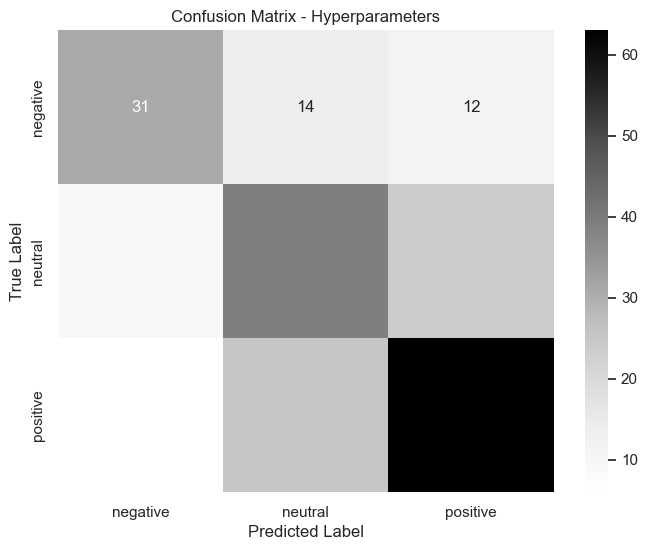

In [371]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Greys', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix - Hyperparameters')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()